In [2]:
import math
import torch
from transformers import BertTokenizer, BertModel, AutoTokenizer, AutoModel
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states=True)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [3]:
def get_bert_embeddings(text, layer=-1):
    # load BERT tokenizer and model
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states=True)
    # tokenize input text
    tokens = tokenizer.encode(text, add_special_tokens=True)
    tokens_tensor = torch.tensor([tokens])
    # get hidden states
    model.eval()
    with torch.no_grad():
        outputs = model(tokens_tensor)
        embeddings = outputs[0].detach().numpy()[0]
        hidden_states = outputs[2]#[layer]
    return embeddings, hidden_states

In [4]:
text = "I love natural language processing"
embeddings, hidden_states = get_bert_embeddings(text)
layer_hidden_states = [hidden_states[i][0].detach().numpy() for i in range(4)]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [5]:
tokens = tokenizer.encode(text, add_special_tokens=True)
tokens_tensor = torch.tensor([tokens])

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


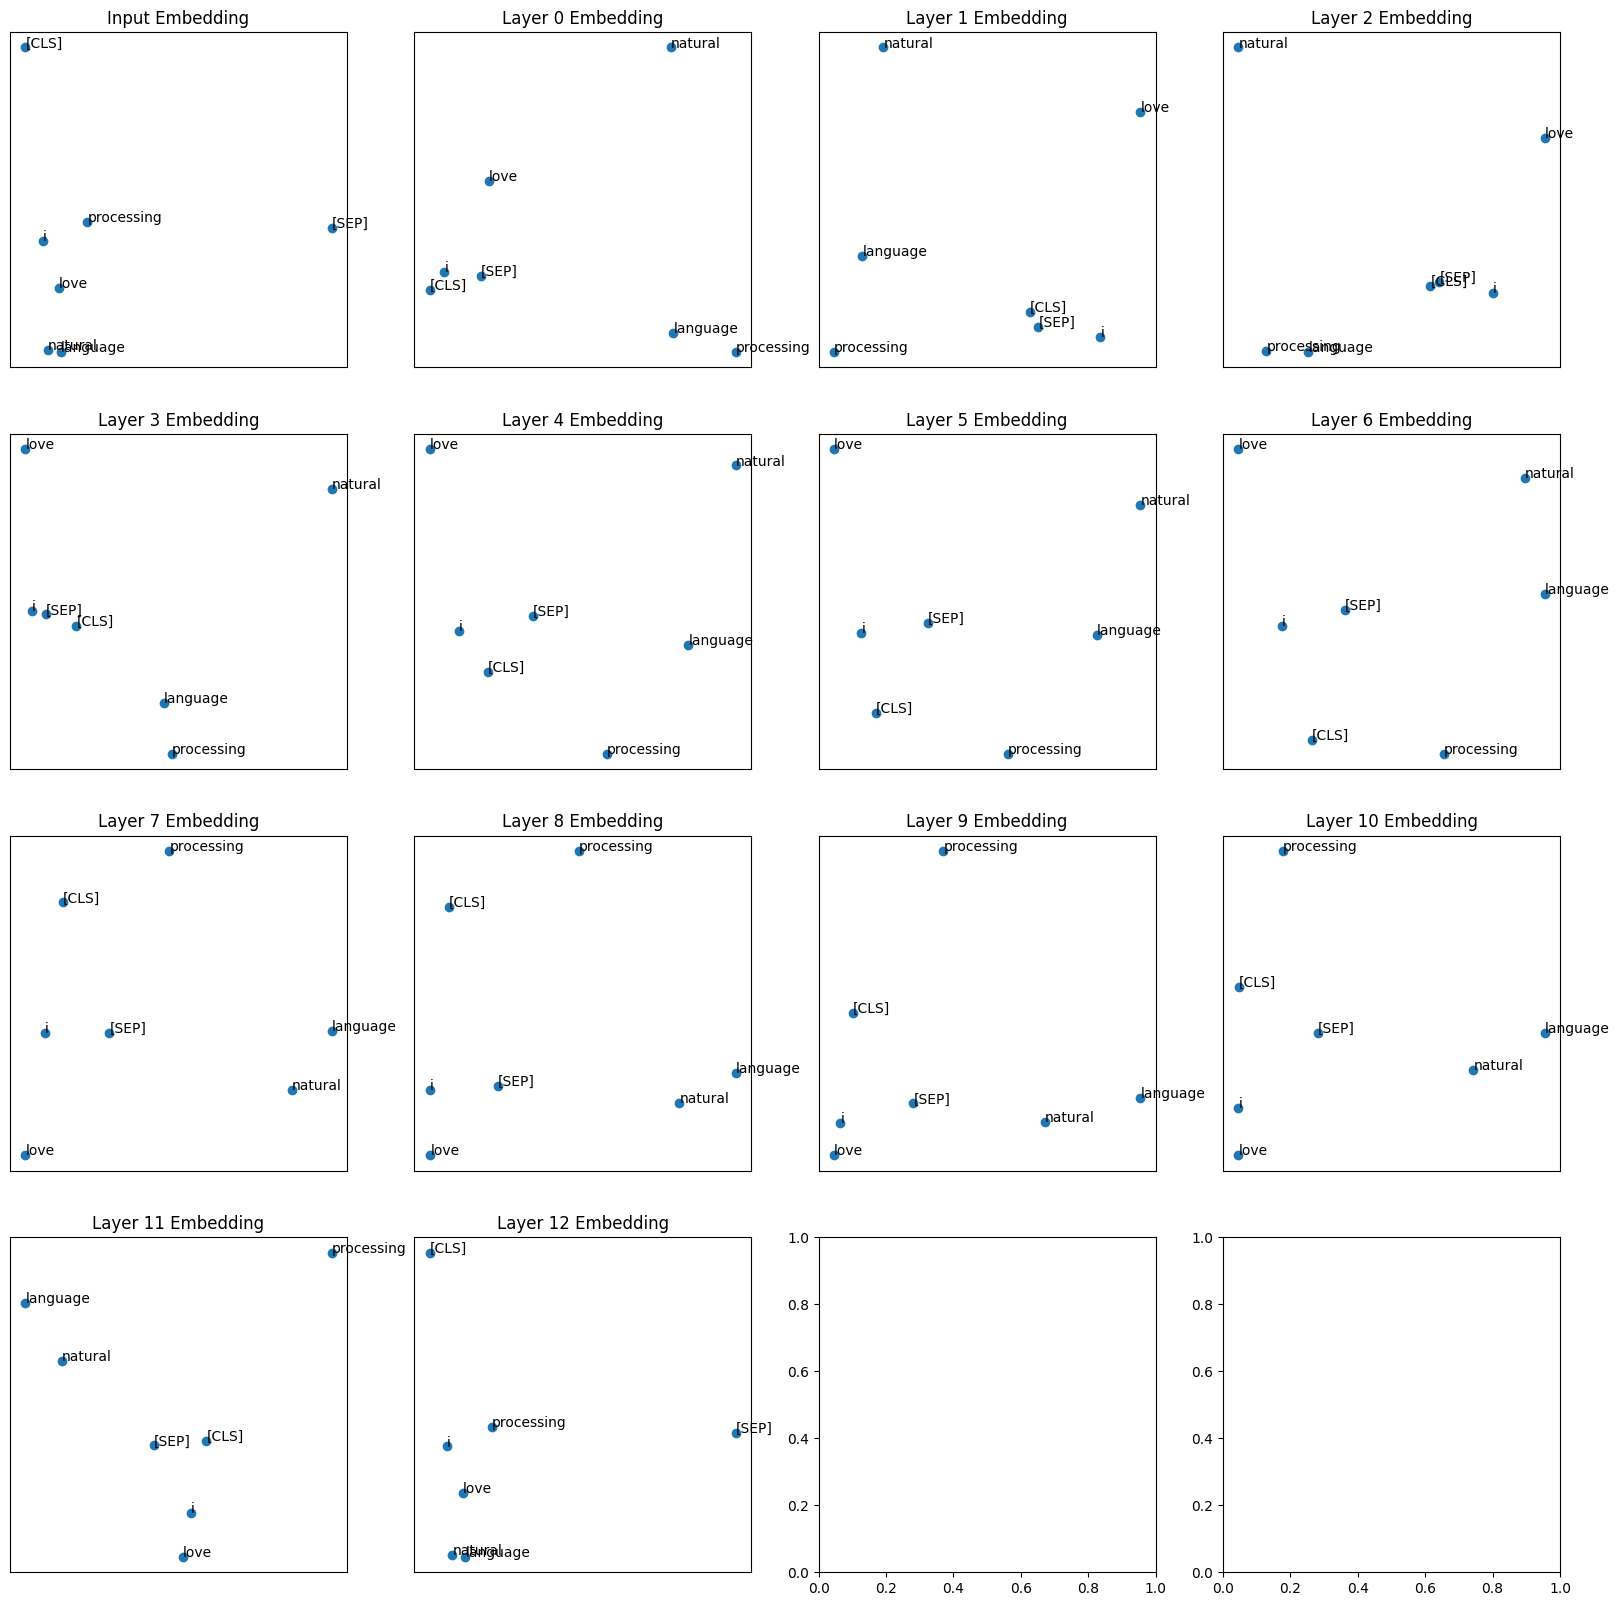

In [6]:

def plot_bert_embeddings(text, layers):
    # get BERT embeddings and hidden states
    embeddings, hidden_states = get_bert_embeddings(text)
    layer_hidden_states = [hidden_states[i][0].detach().numpy() for i in layers]
    # reduce dimensionality using PCA
    pca = PCA(n_components=2)
    pca_embeddings = pca.fit_transform(embeddings)
    pca_layer_hidden_states = [pca.fit_transform(hidden_states) for hidden_states in layer_hidden_states]
    # plot embeddings for each layer
    tokens = tokenizer.encode(text, add_special_tokens=True)


    fig, ax = plt.subplots(4, math.ceil((len(layers) + 1)/4), figsize=(20, 20))
    ax  = ax.ravel()
    for i in range(len(layers) + 1):
        if i == 0:
            ax[i].scatter(pca_embeddings[:,0], pca_embeddings[:,1])
            for j, token in enumerate(tokenizer.convert_ids_to_tokens(tokens)):
                ax[i].annotate(token, xy=(pca_embeddings[j,0], pca_embeddings[j,1]))
            ax[i].set_title('Input Embedding')
        else:
            ax[i].scatter(pca_layer_hidden_states[i-1][:,0], pca_layer_hidden_states[i-1][:,1])
            for j, token in enumerate(tokenizer.convert_ids_to_tokens(tokens)):
                ax[i].annotate(token, xy=(pca_layer_hidden_states[i-1][j,0], pca_layer_hidden_states[i-1][j,1]))
            ax[i].set_title(f'Layer {layers[i-1]} Embedding')
        ax[i].set_xticks([])
        ax[i].set_yticks([])
    plt.show()


text = "I love natural language processing"
layers = [i for i in range(13)]
plot_bert_embeddings(text, layers)

1
9
0 ▁Which (15, 2)
1 ▁is (15, 2)
2 ▁ (15, 2)
3 a (15, 2)
4 ▁species (15, 2)
5 ▁of (15, 2)
6 ▁fish (15, 2)
7 ? (15, 2)
8 ▁Ko (15, 2)
9 i (15, 2)
10 ▁or (15, 2)
11 ▁To (15, 2)
12 y (15, 2)
13 ? (15, 2)
14 </s> (15, 2)
0 ▁Which (15, 2)
1 ▁is (15, 2)
2 ▁ (15, 2)
3 a (15, 2)
4 ▁species (15, 2)
5 ▁of (15, 2)
6 ▁fish (15, 2)
7 ? (15, 2)
8 ▁Ko (15, 2)
9 i (15, 2)
10 ▁or (15, 2)
11 ▁To (15, 2)
12 y (15, 2)
13 ? (15, 2)
14 </s> (15, 2)


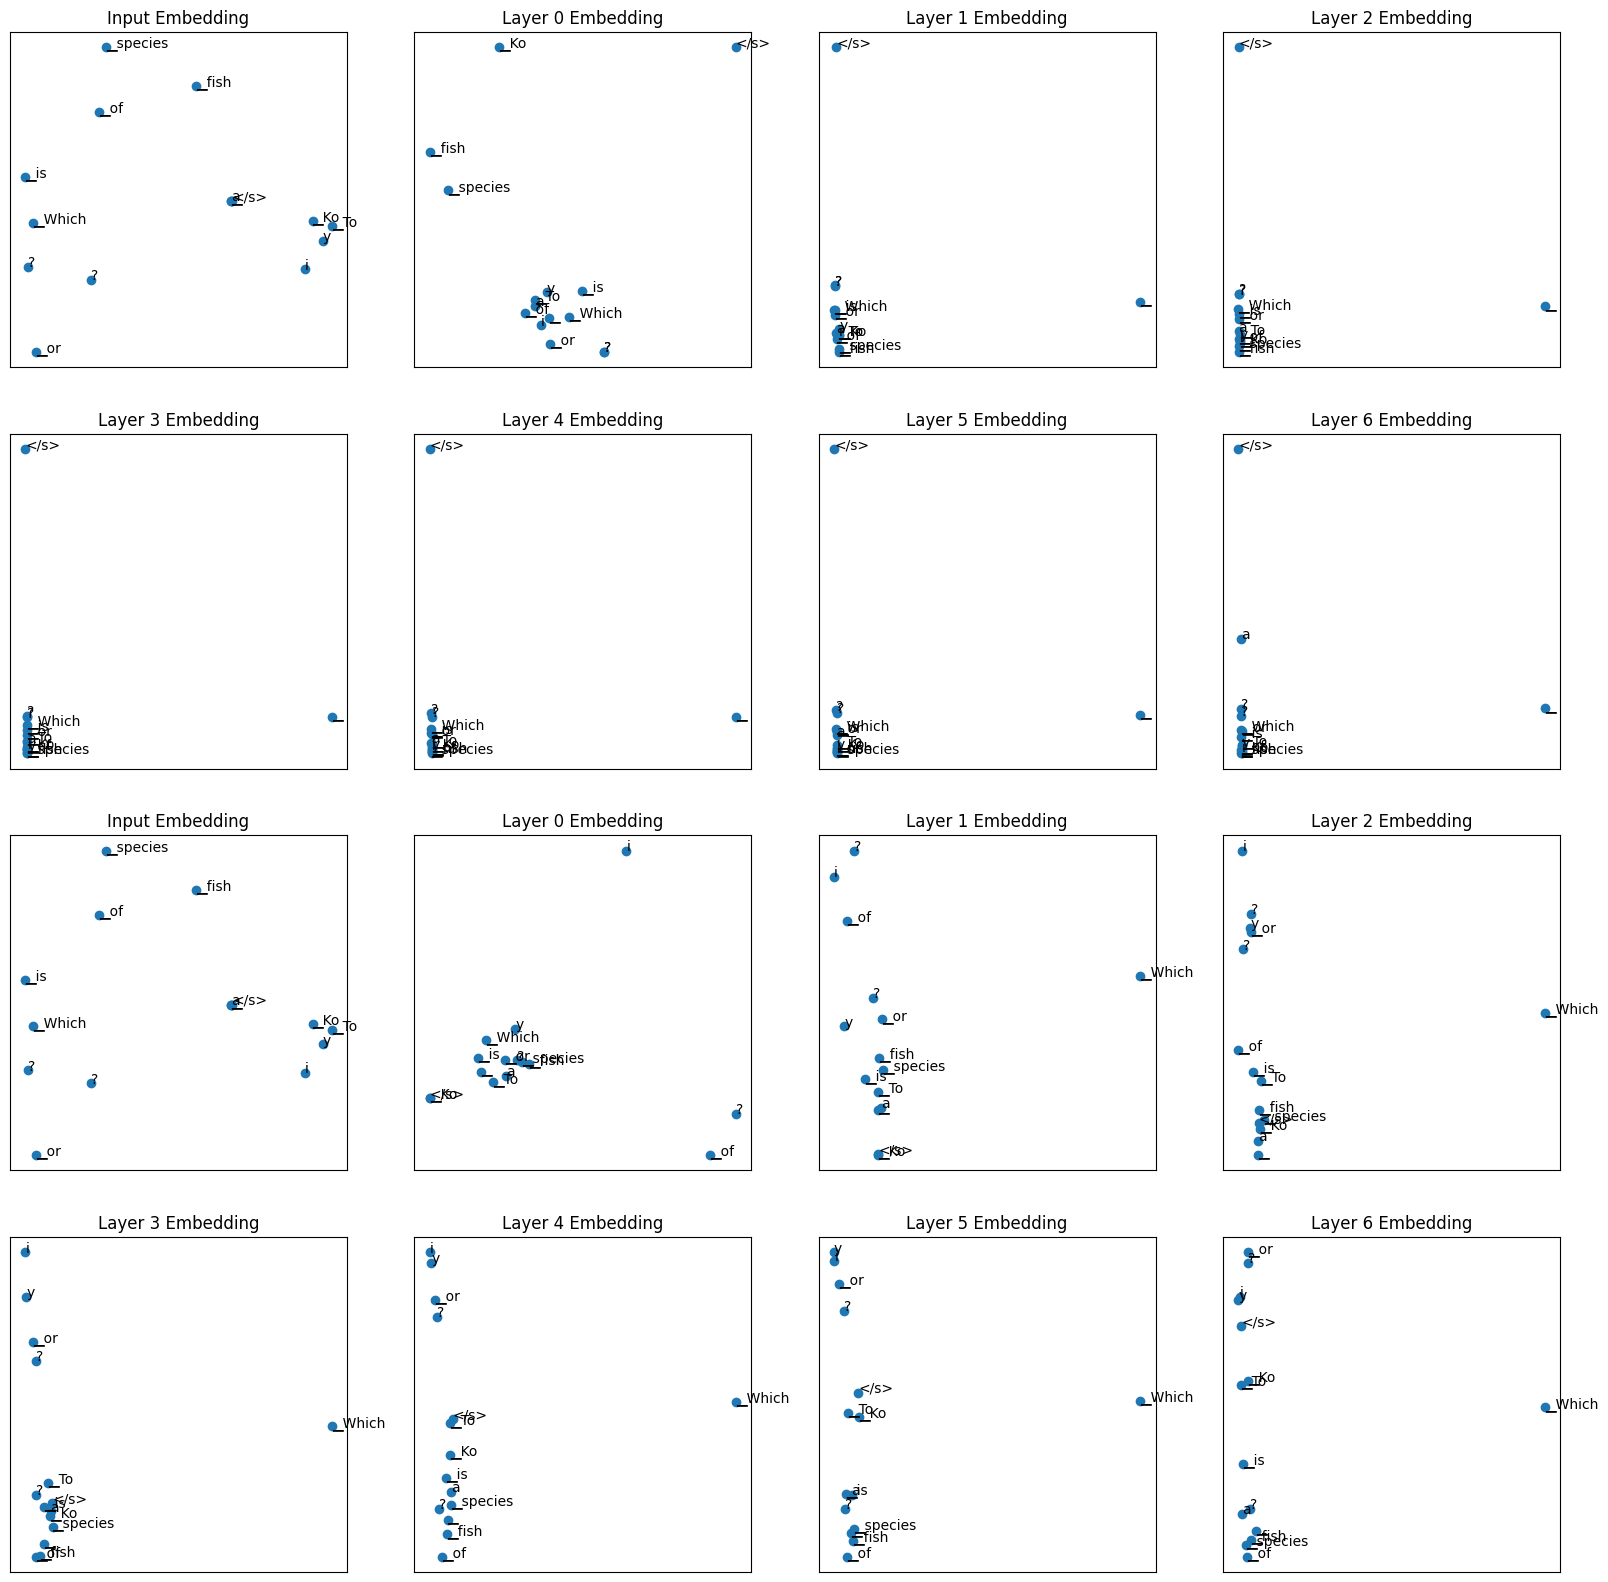

In [8]:
import torch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from transformers import T5Tokenizer, T5ForConditionalGeneration


def get_t5_embeddings(text, input, model):
    prompt_input_ids = tokenizer.encode(text, return_tensors='pt')
    label_input_ids = tokenizer.encode(input, return_tensors='pt')
    with torch.no_grad():
        output = model(input_ids=prompt_input_ids, labels=label_input_ids)
        embeddings = output.encoder_last_hidden_state[0].detach().numpy()
        enc_hidden_states = output.encoder_hidden_states
        dec_hidden_states = output.decoder_hidden_states
        #print(enc_hidden_states)
    return embeddings, enc_hidden_states, dec_hidden_states

def plot_t5_embeddings(text, input, figsize=(20,20)):
    # get T5 embeddings and hidden states
    embeddings, enc_hidden_states, dec_hidden_states = get_t5_embeddings(text, input, model)
    encoder_hidden_states = enc_hidden_states#hidden_states[1:]
    decoder_hidden_states = dec_hidden_states#hidden_states[0]
    # reduce dimensionality using PCA
    pca = PCA(n_components=2)
    pca_embeddings = pca.fit_transform(embeddings)
    
    print(len(encoder_hidden_states[0]))
    pca_encoder_hidden_states = [pca.fit_transform(hidden_states[0]) for hidden_states in encoder_hidden_states]
    pca_decoder_hidden_states = [pca.fit_transform(hidden_states[0]) for hidden_states in decoder_hidden_states] #pca.fit_transform(decoder_hidden_states)
    # plot embeddings for each layer
    
    # fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    # ax[0].scatter(pca_encoder_hidden_states[-1][:,0], pca_encoder_hidden_states[-1][:,1])
    # for j, token in enumerate(tokenizer.convert_ids_to_tokens(input_ids[0])):
    #     ax[0].annotate(token, xy=(pca_encoder_hidden_states[-1][j,0], pca_encoder_hidden_states[-1][j,1]))
    # ax[0].set_title('Encoder Embedding')
    # ax[0].set_xticks([])
    # ax[0].set_yticks([])
    # ax[1].scatter(pca_decoder_hidden_states[-1][:,0], pca_decoder_hidden_states[-1][:,1])
    # for j, token in enumerate(tokenizer.convert_ids_to_tokens(input_ids[0])):
    #     ax[1].annotate(token, xy=(pca_decoder_hidden_states[-1][j,0], pca_decoder_hidden_states[-1][j,1]))
    # ax[1].set_title('Decoder Embedding')
    # ax[1].set_xticks([])
    # ax[1].set_yticks([])
    # plt.show()
    
    print(len(encoder_hidden_states))
    tokens = tokenizer.encode(text)#, add_special_tokens=True)
    dec_tokens = tokenizer.encode(input)#, add_special_tokens=True)
    
    fig, ax = plt.subplots(math.ceil((len(layers) + 1)/4)*2, 4, figsize=figsize)
    ax  = ax.ravel()
    for i in range(len(layers) + 1):
        if i == 0:
            ax[i].scatter(pca_embeddings[:,0], pca_embeddings[:,1])
            for j, token in enumerate(tokenizer.convert_ids_to_tokens(tokens)):
                print(j,token, pca_embeddings.shape)
                ax[i].annotate(token, xy=(pca_embeddings[j,0], pca_embeddings[j,1]))
            ax[i].set_title('Input Embedding')
        else:
            ax[i].scatter(pca_encoder_hidden_states[i-1][:,0], pca_encoder_hidden_states[i-1][:,1])
            for j, token in enumerate(tokenizer.convert_ids_to_tokens(tokens)):
                ax[i].annotate(token, xy=(pca_encoder_hidden_states[i-1][j,0], pca_encoder_hidden_states[i-1][j,1]))
            ax[i].set_title(f'Layer {layers[i-1]} Embedding')
        ax[i].set_xticks([])
        ax[i].set_yticks([])
    add_num = len(layers) + 1
    
    for i in range(len(layers) + 1):
        if i == 0:
            ax[i+add_num].scatter(pca_embeddings[:,0], pca_embeddings[:,1])
            for j, token in enumerate(tokenizer.convert_ids_to_tokens(tokens)):
                print(j,token, pca_embeddings.shape)
                ax[i+add_num].annotate(token, xy=(pca_embeddings[j,0], pca_embeddings[j,1]))
            ax[i+add_num].set_title('Input Embedding')
        else:
            ax[i+add_num].scatter(pca_decoder_hidden_states[i-1][:,0], pca_decoder_hidden_states[i-1][:,1])
            for j, token in enumerate(tokenizer.convert_ids_to_tokens(dec_tokens)):
                ax[i+add_num].annotate(token, xy=(pca_decoder_hidden_states[i-1][j,0], pca_decoder_hidden_states[i-1][j,1]))
            ax[i+add_num].set_title(f'Layer {layers[i-1]} Embedding')
        ax[i+add_num].set_xticks([])
        ax[i+add_num].set_yticks([])
    plt.show()


tokenizer = T5Tokenizer.from_pretrained('google/flan-t5-small')
model = T5ForConditionalGeneration.from_pretrained('google/flan-t5-small', output_hidden_states=True)

layers = [i for i in range(7)]
text = "translate English to French"
input = "today weather is so hot."

text = "Which is a species of fish? Koi or Toy?"
inputs = "Which is a species of fish? Koi or Toy?"

plot_t5_embeddings(text, inputs)

1
9
0 ▁Which (15, 2)
1 ▁is (15, 2)
2 ▁ (15, 2)
3 a (15, 2)
4 ▁species (15, 2)
5 ▁of (15, 2)
6 ▁fish (15, 2)
7 ? (15, 2)
8 ▁Ko (15, 2)
9 i (15, 2)
10 ▁or (15, 2)
11 ▁To (15, 2)
12 y (15, 2)
13 ? (15, 2)
14 </s> (15, 2)
0 ▁Which (15, 2)
1 ▁is (15, 2)
2 ▁ (15, 2)
3 a (15, 2)
4 ▁species (15, 2)
5 ▁of (15, 2)
6 ▁fish (15, 2)
7 ? (15, 2)
8 ▁Ko (15, 2)
9 i (15, 2)
10 ▁or (15, 2)
11 ▁To (15, 2)
12 y (15, 2)
13 ? (15, 2)
14 </s> (15, 2)


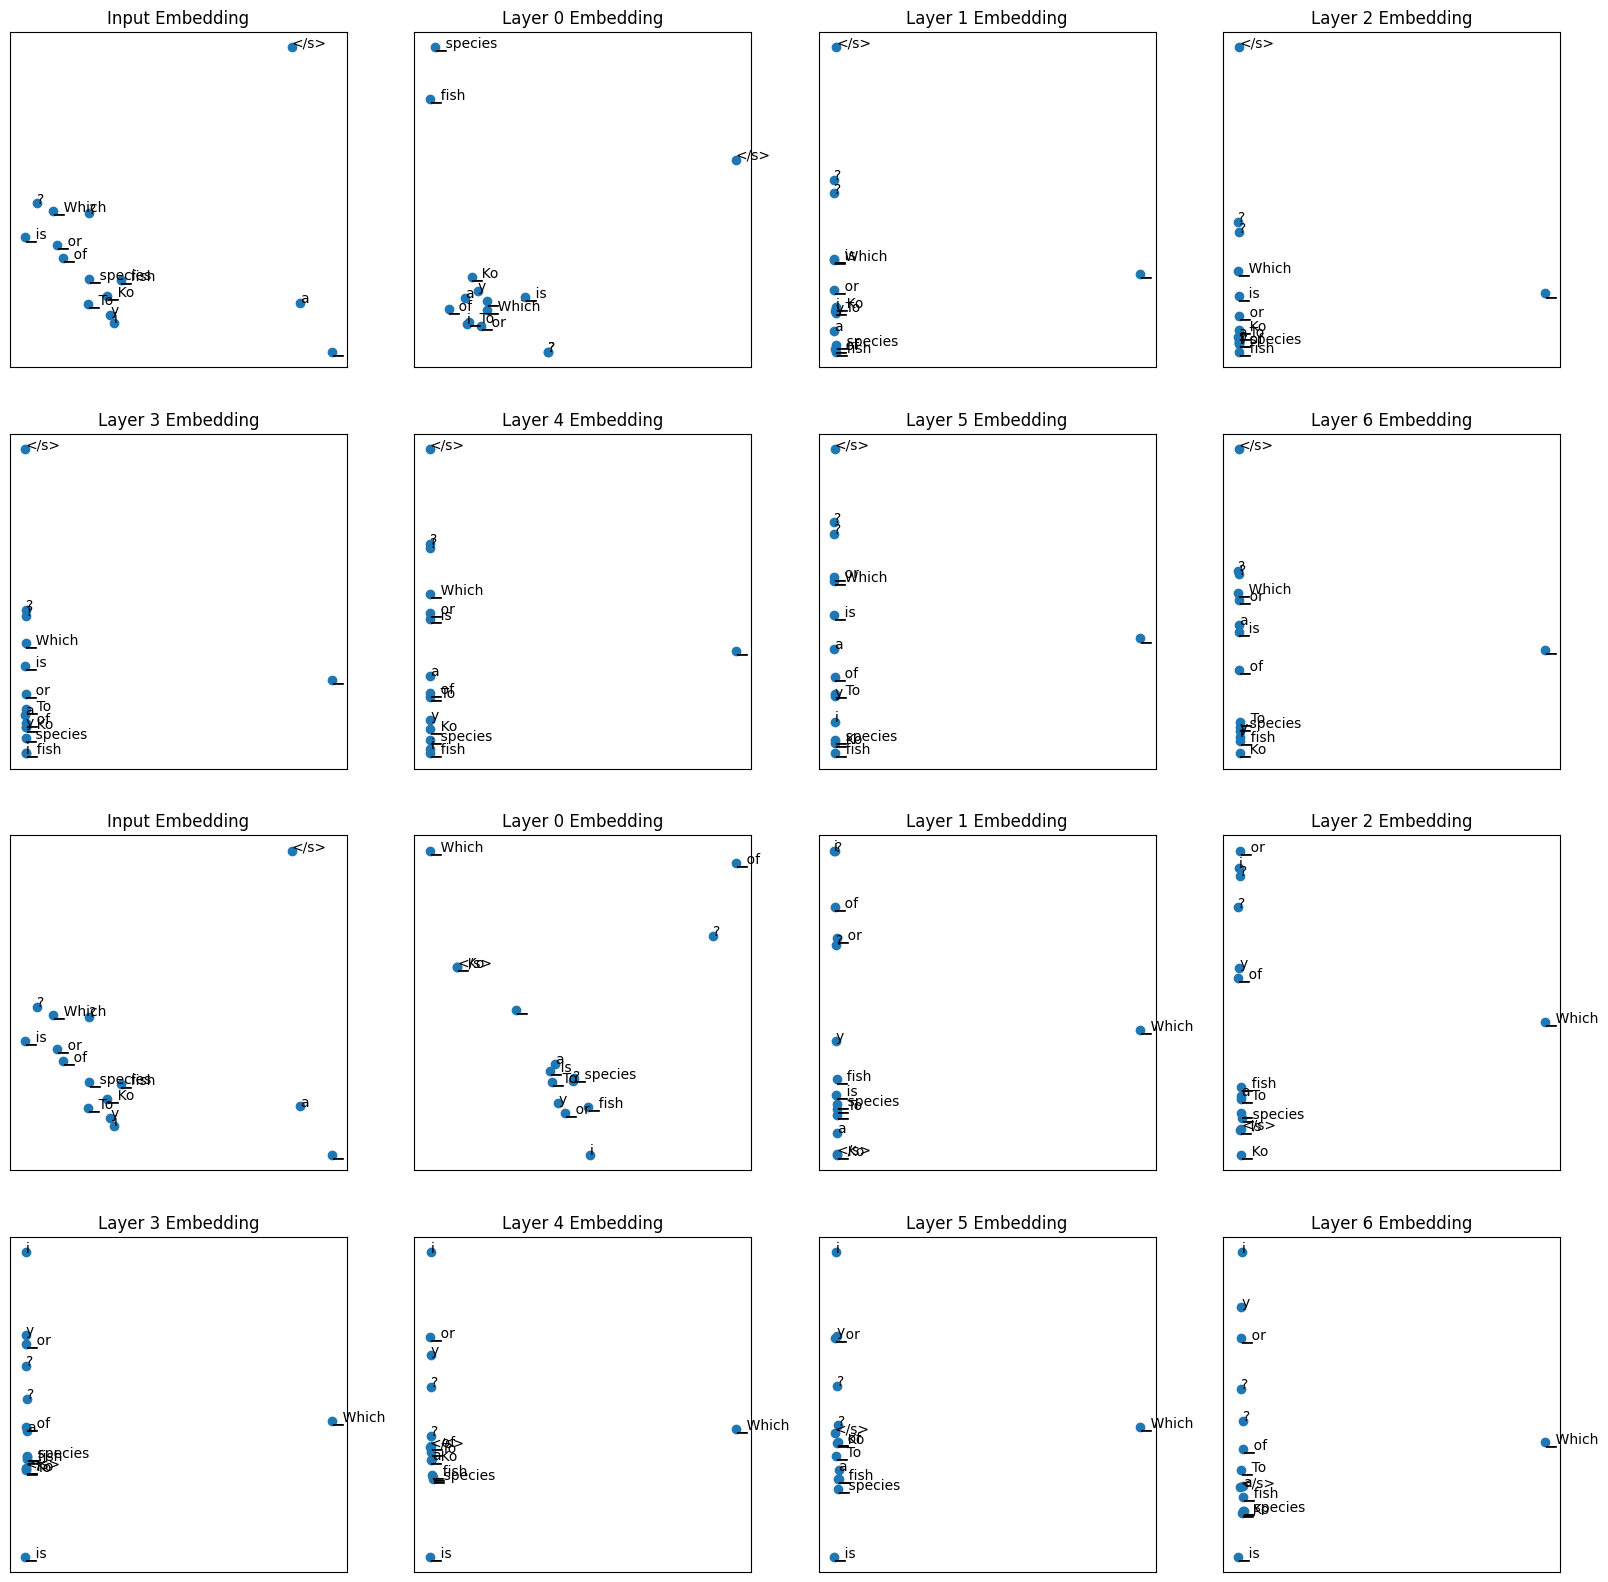

In [10]:
tokenizer = T5Tokenizer.from_pretrained('google/t5-v1_1-small')
model = T5ForConditionalGeneration.from_pretrained('google/t5-v1_1-small', output_hidden_states=True)

layers = [i for i in range(7)]
text = "translate English to French"
inputs = "today weather is so hot."

text = "Which is a species of fish? Koi or Toy?"
inputs = "Which is a species of fish? Koi or Toy?"

plot_t5_embeddings(text, inputs)

1
13
0 ▁Which (15, 2)
1 ▁is (15, 2)
2 ▁ (15, 2)
3 a (15, 2)
4 ▁species (15, 2)
5 ▁of (15, 2)
6 ▁fish (15, 2)
7 ? (15, 2)
8 ▁Ko (15, 2)
9 i (15, 2)
10 ▁or (15, 2)
11 ▁To (15, 2)
12 y (15, 2)
13 ? (15, 2)
14 </s> (15, 2)
0 ▁Which (15, 2)
1 ▁is (15, 2)
2 ▁ (15, 2)
3 a (15, 2)
4 ▁species (15, 2)
5 ▁of (15, 2)
6 ▁fish (15, 2)
7 ? (15, 2)
8 ▁Ko (15, 2)
9 i (15, 2)
10 ▁or (15, 2)
11 ▁To (15, 2)
12 y (15, 2)
13 ? (15, 2)
14 </s> (15, 2)


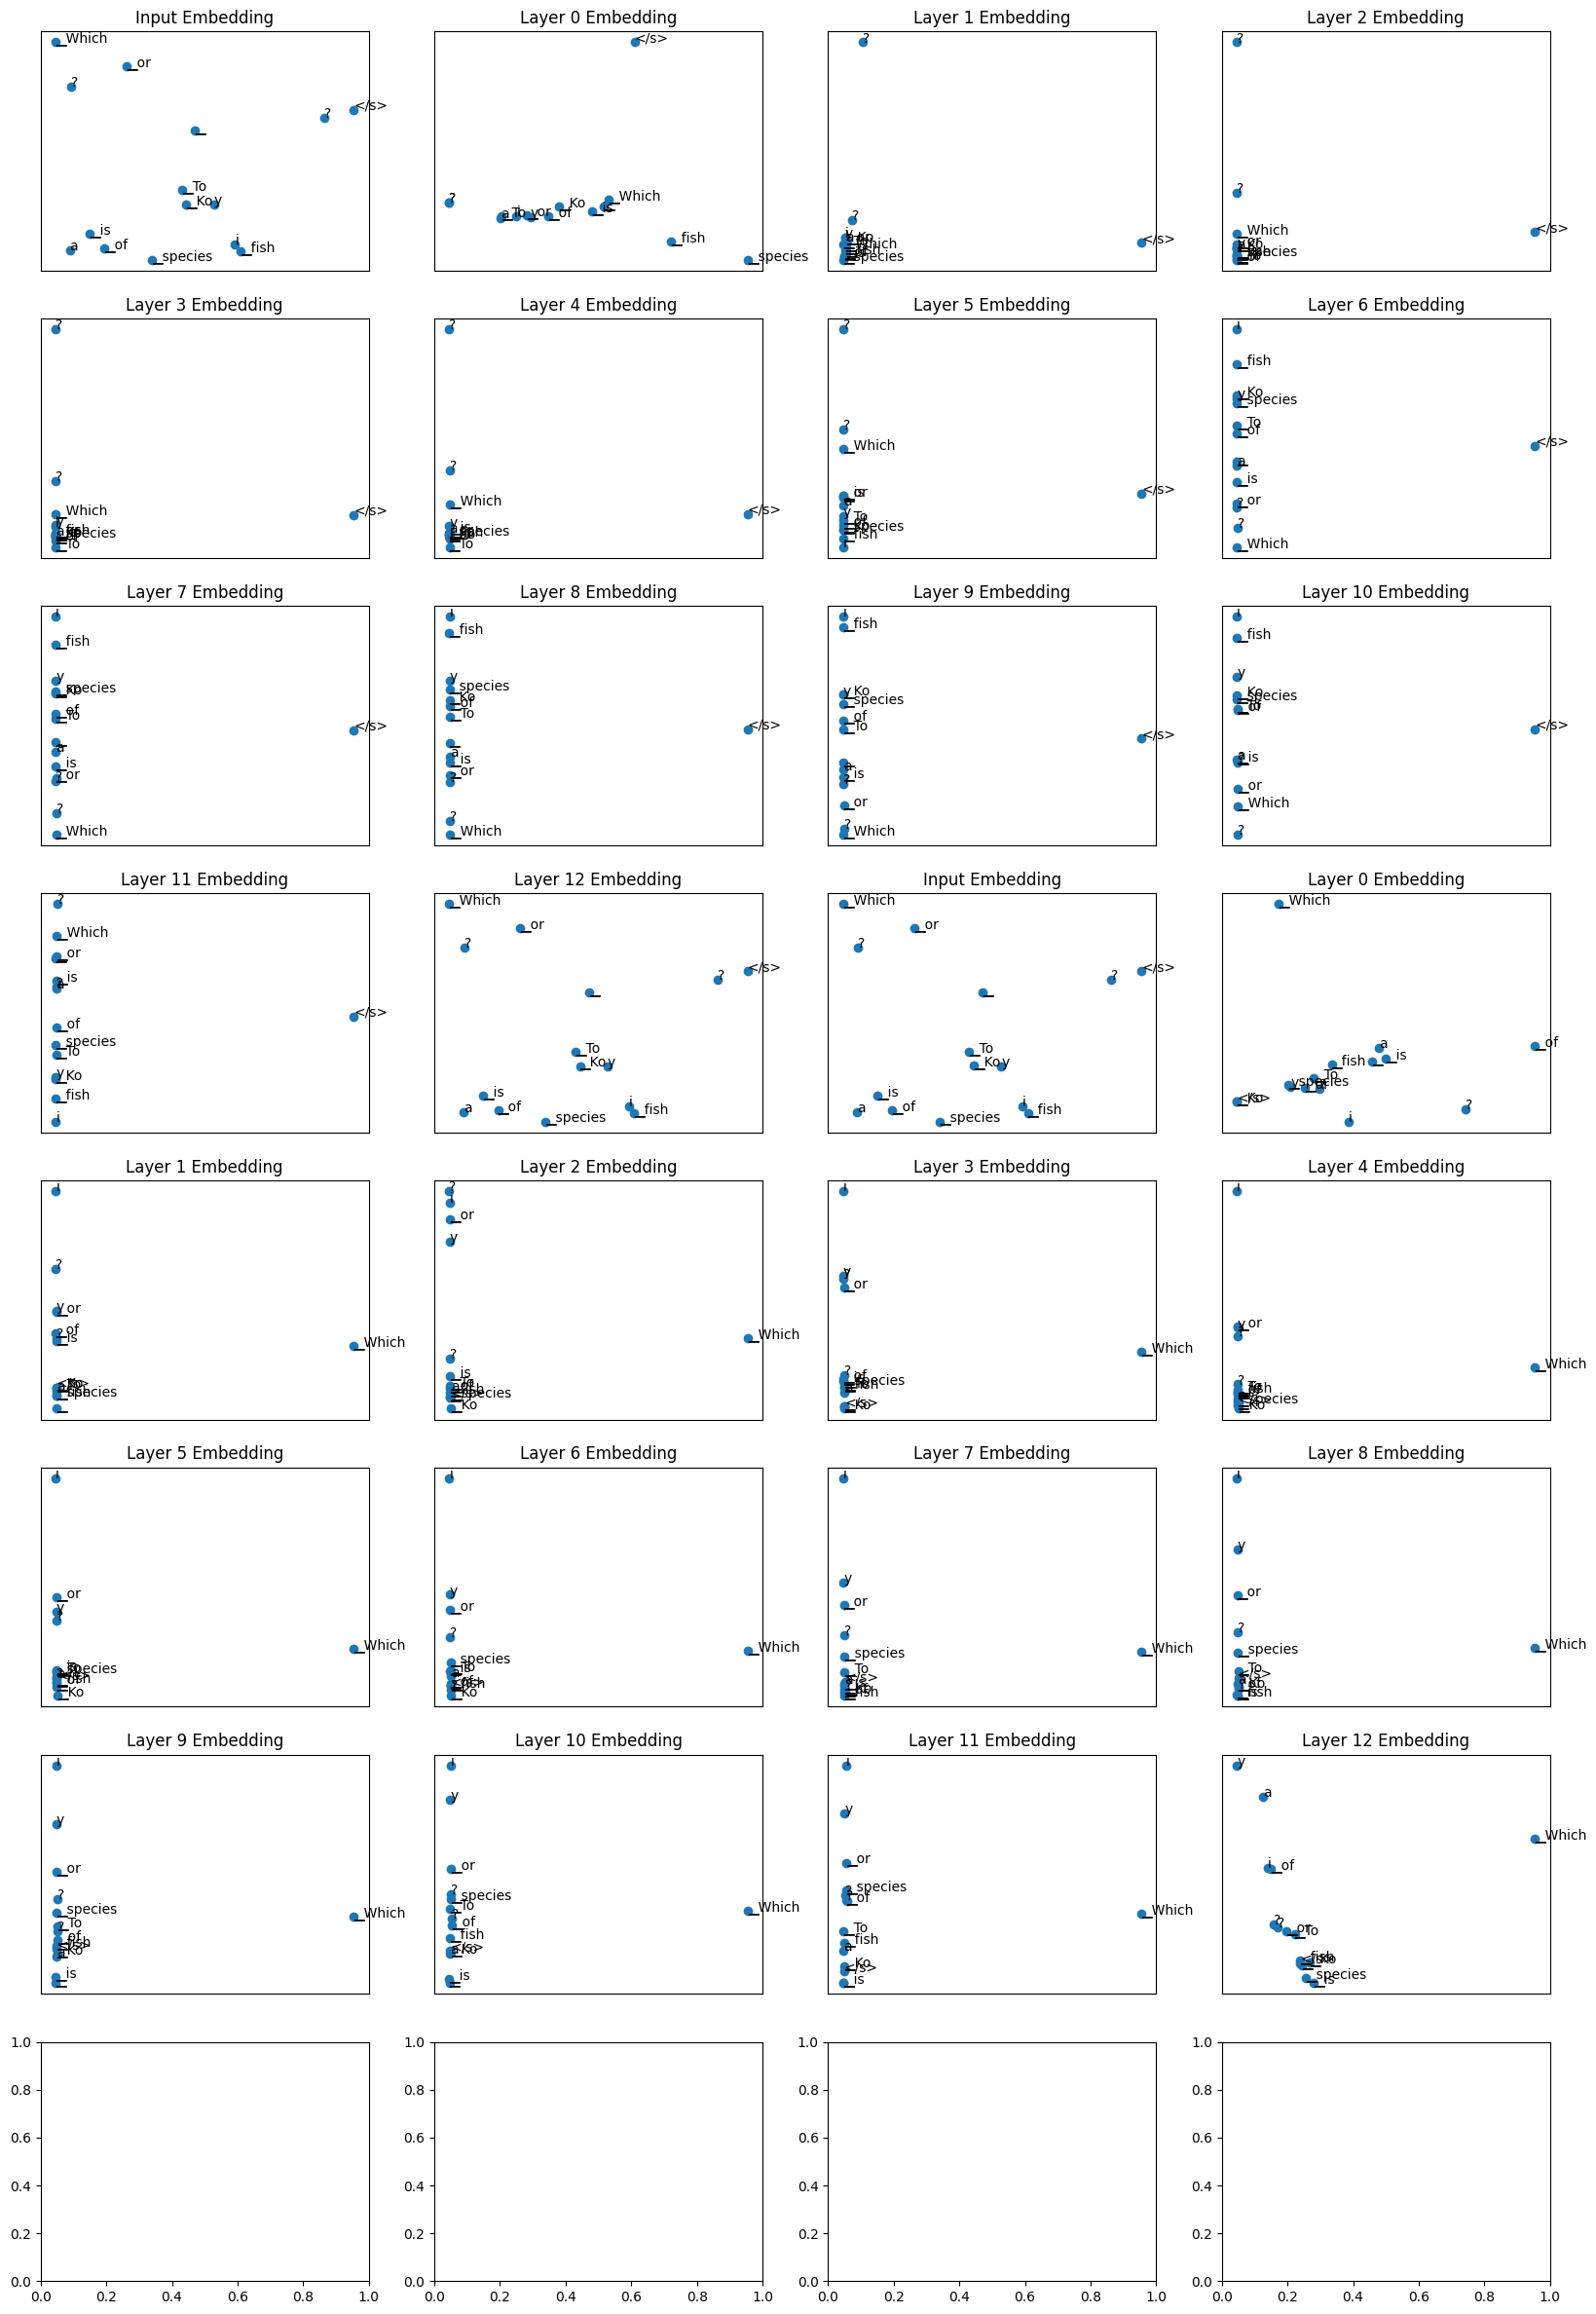

In [12]:
tokenizer = T5Tokenizer.from_pretrained('google/t5-v1_1-small')
model = T5ForConditionalGeneration.from_pretrained('google/t5-v1_1-base', output_hidden_states=True)

layers = [i for i in range(13)]
text = "Which is a species of fish? Koi or Toy?"
input = "Which is a species of fish? Koi or Toy?"
plot_t5_embeddings(text, input, (20,30))

#  Model Scale 별 Sentence Embedding비교

In [29]:
text = "translate English to French"
input = "today weather is so hot."
text = "Is it a gas, liquid, or solid"
input = "Is it a gas, liquid, or solid"

Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

1
25
0 ▁I (12, 2)
1 s (12, 2)
2 ▁it (12, 2)
3 ▁ (12, 2)
4 a (12, 2)
5 ▁gas (12, 2)
6 , (12, 2)
7 ▁liquid (12, 2)
8 , (12, 2)
9 ▁or (12, 2)
10 ▁solid (12, 2)
11 </s> (12, 2)
0 ▁I (12, 2)
1 s (12, 2)
2 ▁it (12, 2)
3 ▁ (12, 2)
4 a (12, 2)
5 ▁gas (12, 2)
6 , (12, 2)
7 ▁liquid (12, 2)
8 , (12, 2)
9 ▁or (12, 2)
10 ▁solid (12, 2)
11 </s> (12, 2)


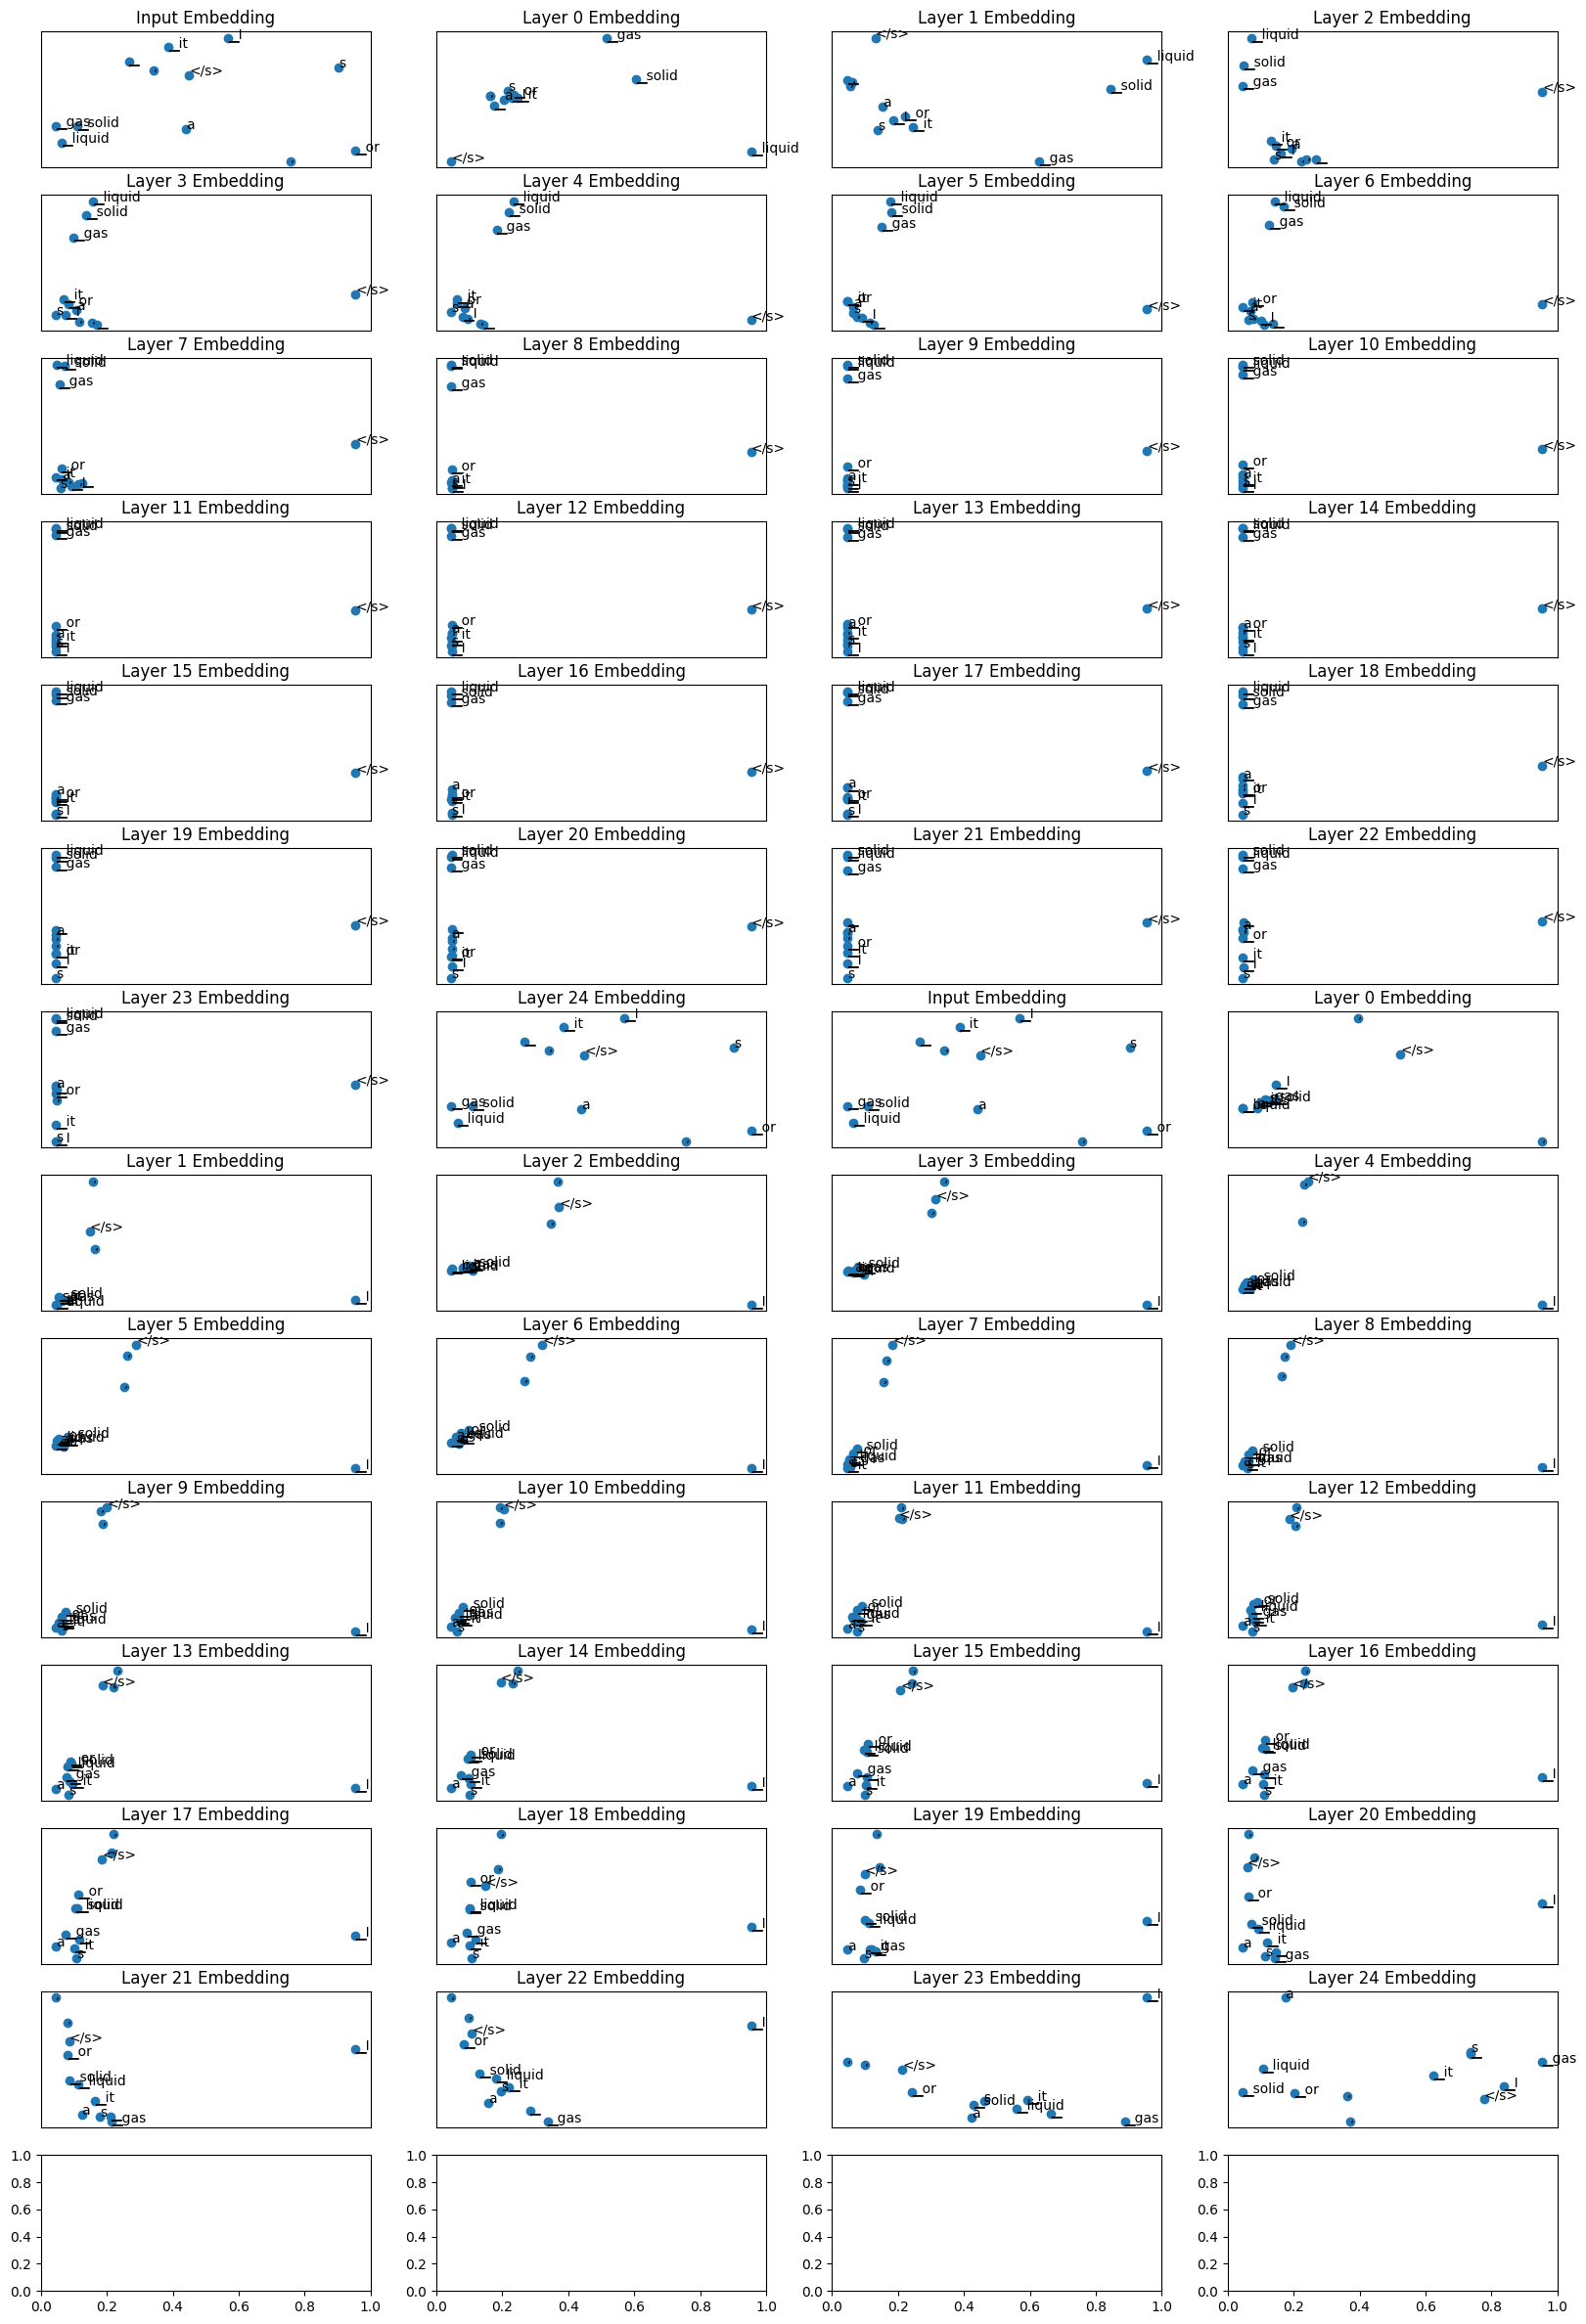

In [30]:
tokenizer = T5Tokenizer.from_pretrained('google/t5-v1_1-small')
model = T5ForConditionalGeneration.from_pretrained('google/flan-t5-xxl', output_hidden_states=True)

layers = [i for i in range(25)]
plot_t5_embeddings(text, input, (20,30))

1
25
0 ▁I (12, 2)
1 s (12, 2)
2 ▁it (12, 2)
3 ▁ (12, 2)
4 a (12, 2)
5 ▁gas (12, 2)
6 , (12, 2)
7 ▁liquid (12, 2)
8 , (12, 2)
9 ▁or (12, 2)
10 ▁solid (12, 2)
11 </s> (12, 2)
0 ▁I (12, 2)
1 s (12, 2)
2 ▁it (12, 2)
3 ▁ (12, 2)
4 a (12, 2)
5 ▁gas (12, 2)
6 , (12, 2)
7 ▁liquid (12, 2)
8 , (12, 2)
9 ▁or (12, 2)
10 ▁solid (12, 2)
11 </s> (12, 2)


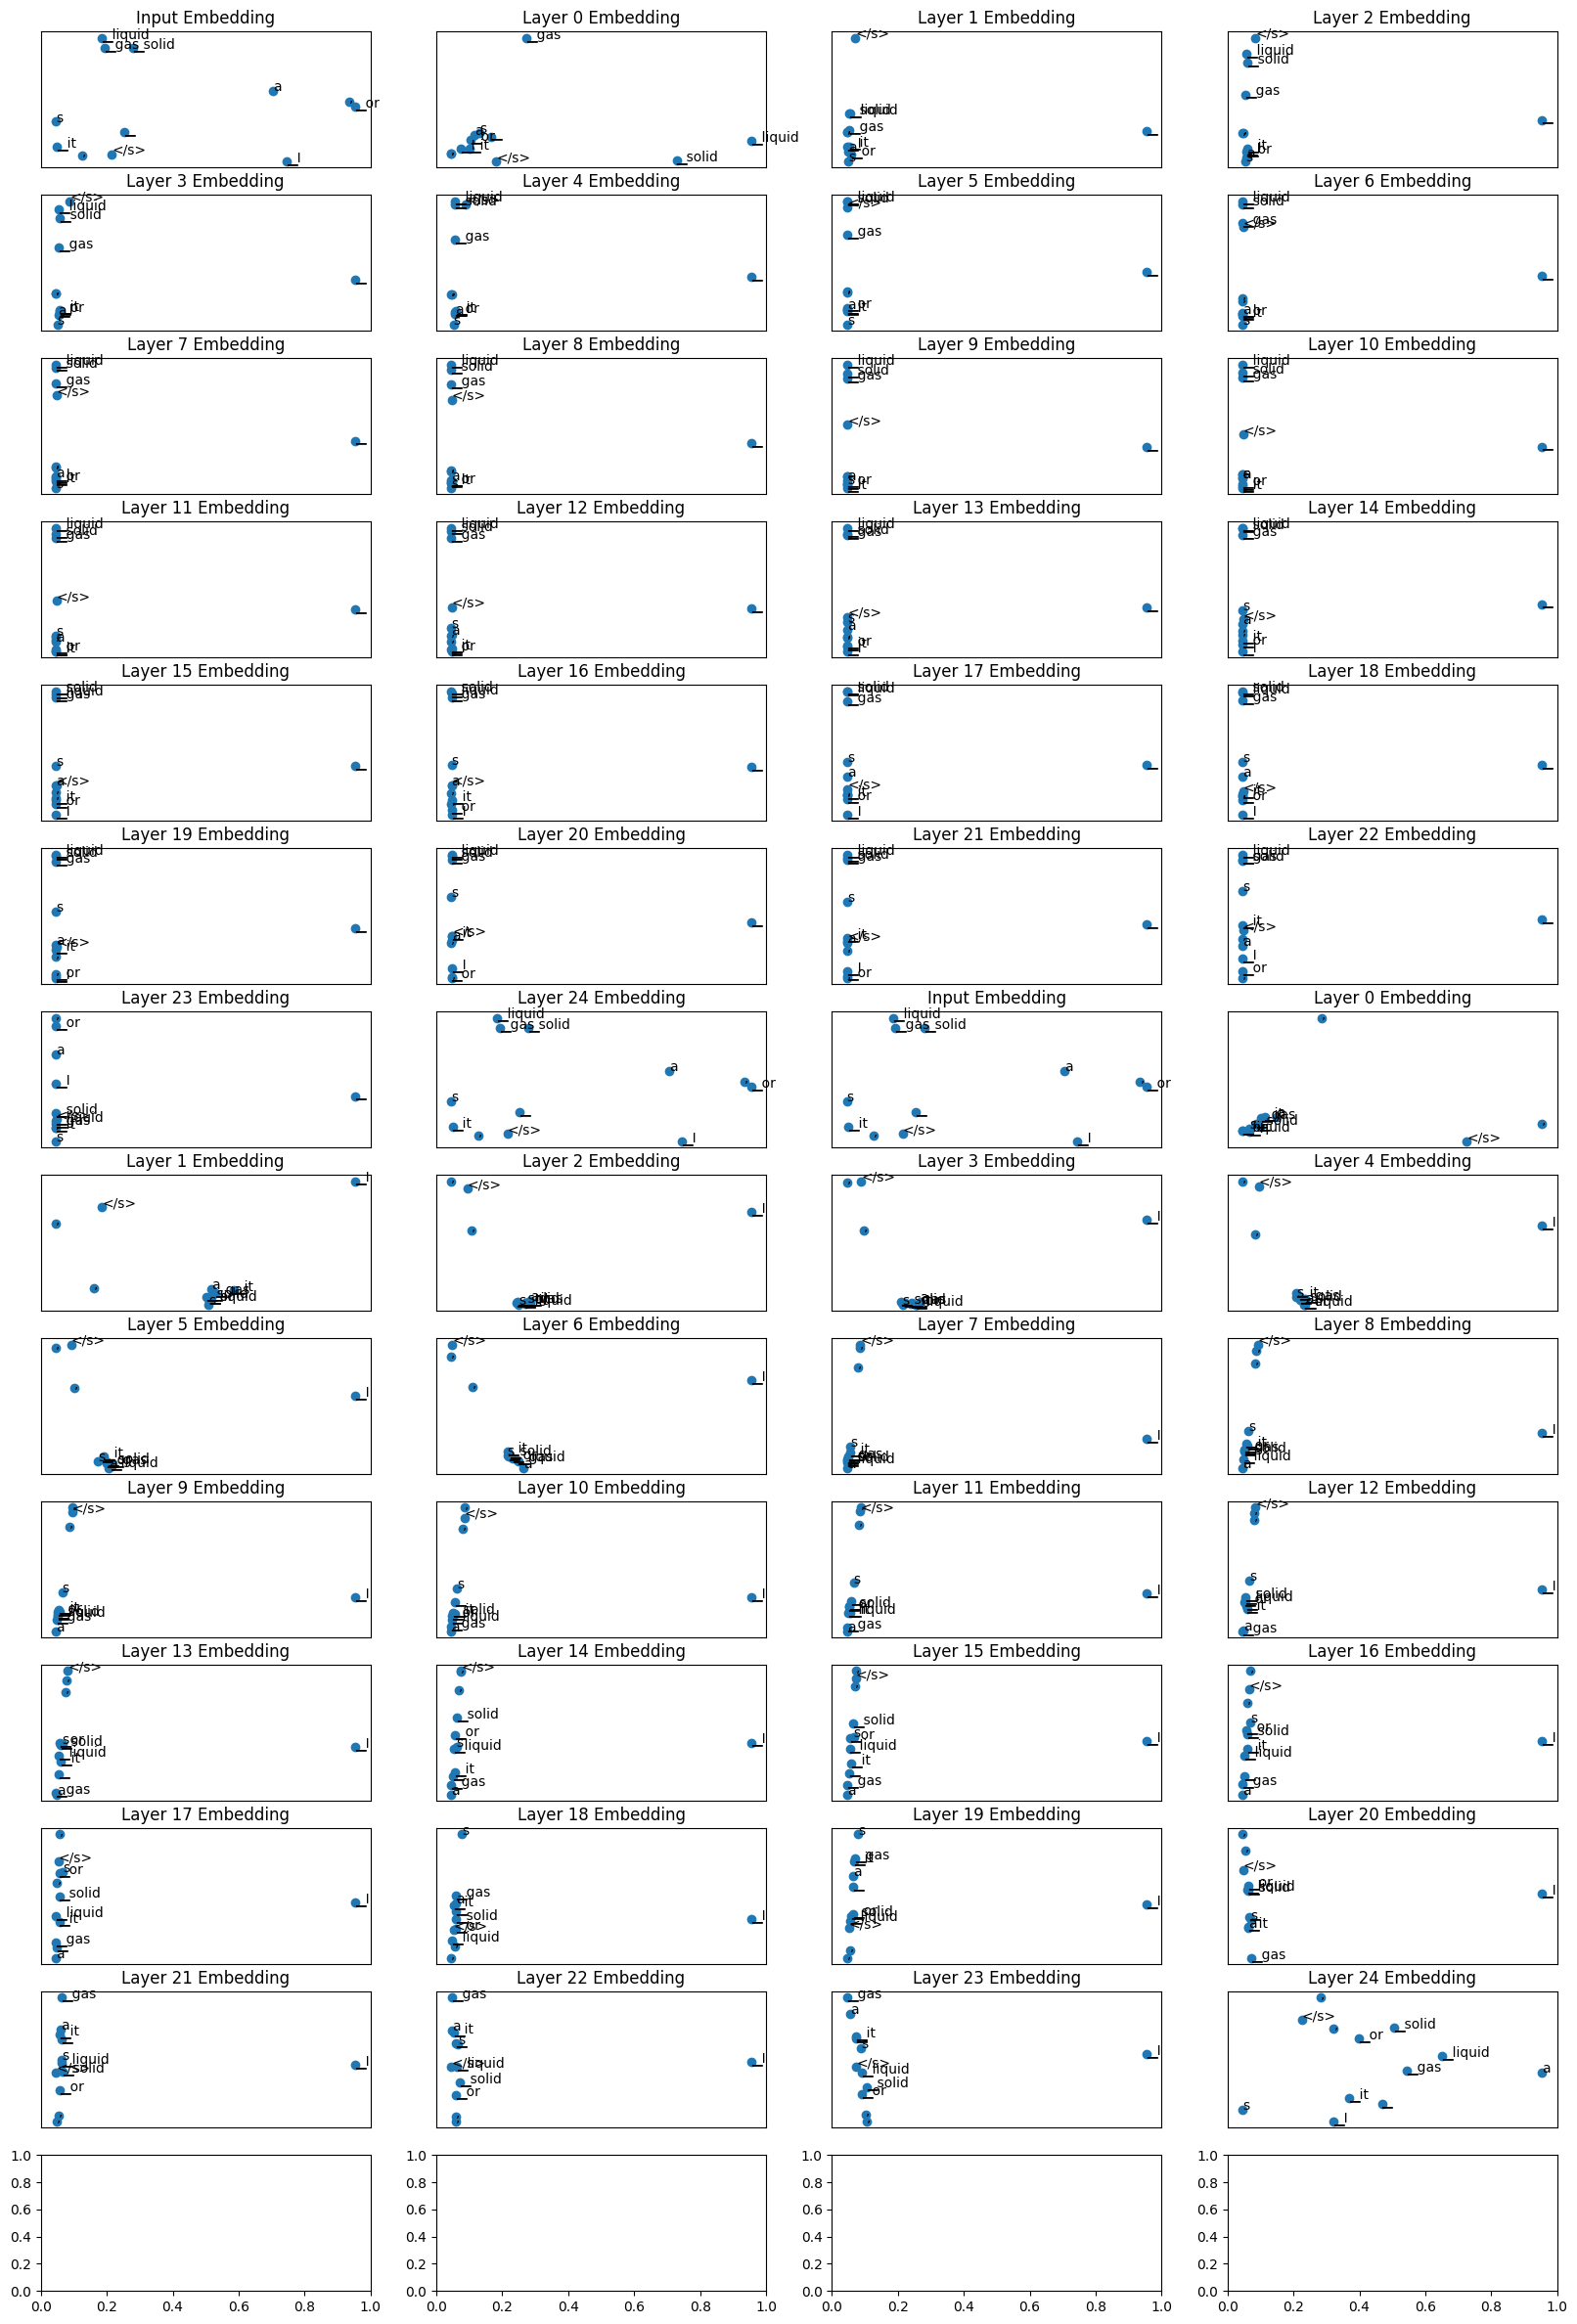

In [31]:

tokenizer = T5Tokenizer.from_pretrained('google/t5-v1_1-small')
model = T5ForConditionalGeneration.from_pretrained('google/flan-t5-large', output_hidden_states=True)

layers = [i for i in range(25)]
plot_t5_embeddings(text, input, (20,30))

1
13
0 ▁I (12, 2)
1 s (12, 2)
2 ▁it (12, 2)
3 ▁ (12, 2)
4 a (12, 2)
5 ▁gas (12, 2)
6 , (12, 2)
7 ▁liquid (12, 2)
8 , (12, 2)
9 ▁or (12, 2)
10 ▁solid (12, 2)
11 </s> (12, 2)
0 ▁I (12, 2)
1 s (12, 2)
2 ▁it (12, 2)
3 ▁ (12, 2)
4 a (12, 2)
5 ▁gas (12, 2)
6 , (12, 2)
7 ▁liquid (12, 2)
8 , (12, 2)
9 ▁or (12, 2)
10 ▁solid (12, 2)
11 </s> (12, 2)


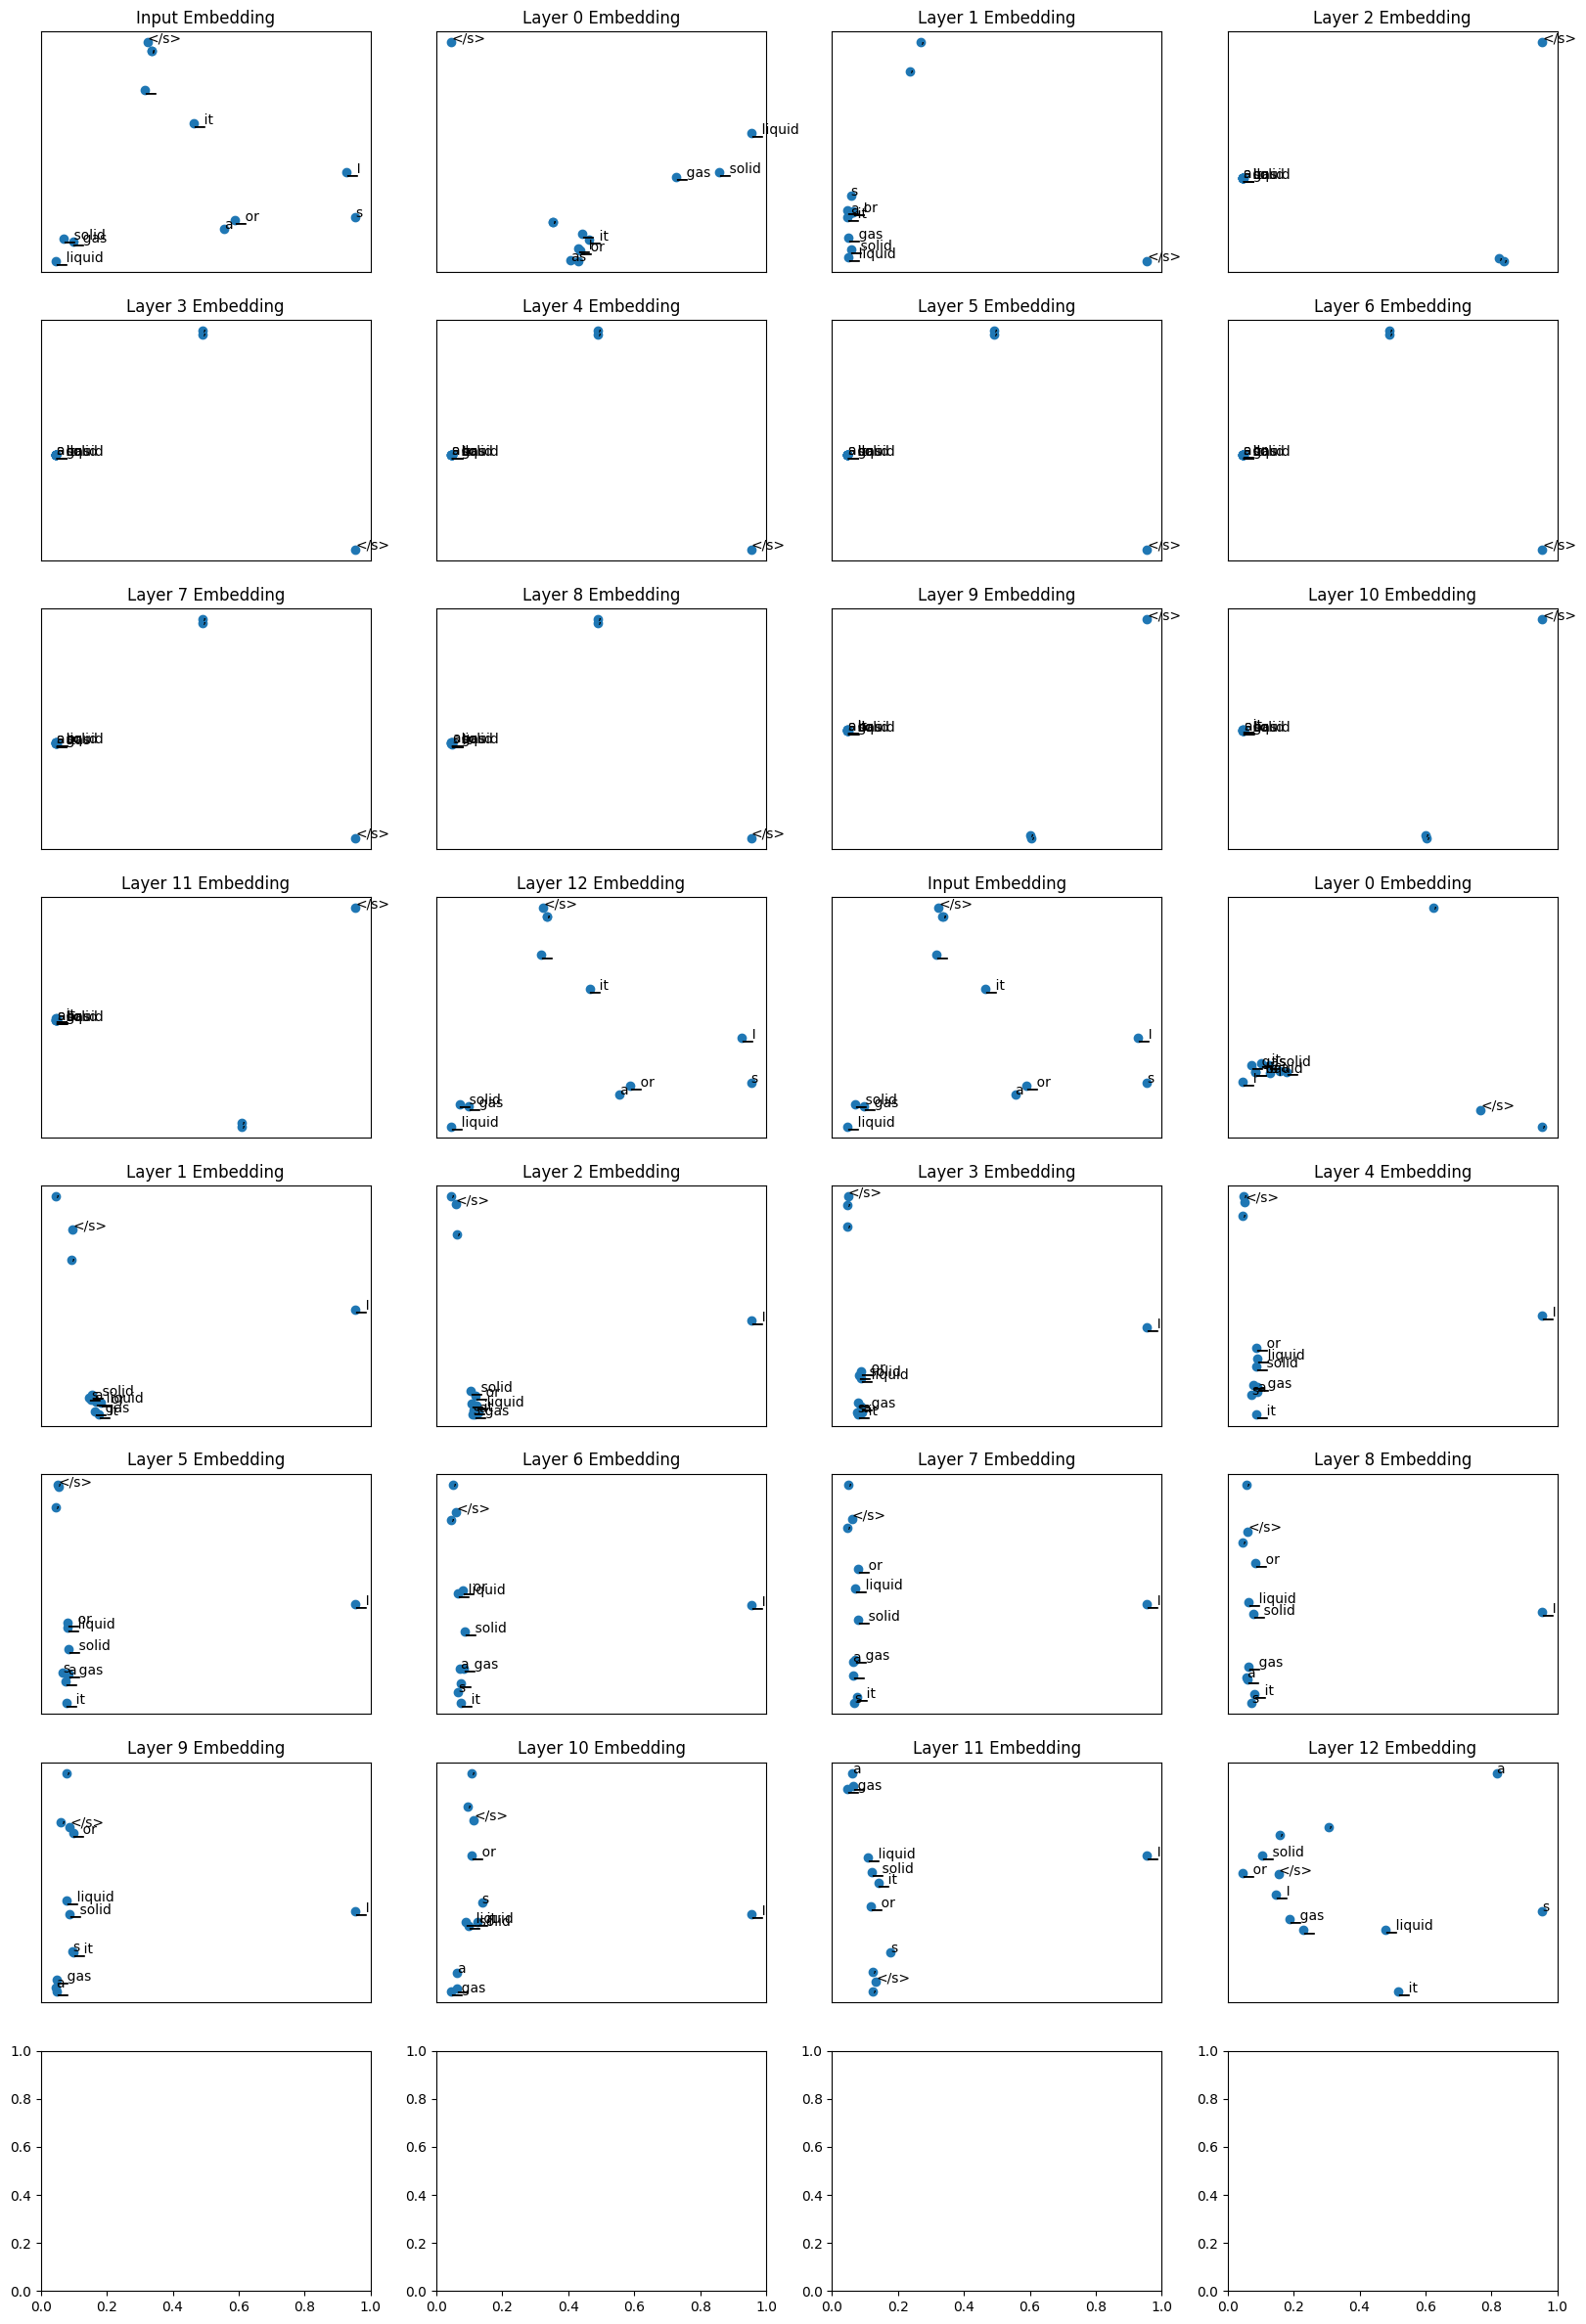

In [32]:

tokenizer = T5Tokenizer.from_pretrained('google/t5-v1_1-small')
model = T5ForConditionalGeneration.from_pretrained('google/flan-t5-base', output_hidden_states=True)

layers = [i for i in range(13)]
plot_t5_embeddings(text, input, (20,30))

1
9
0 ▁I (12, 2)
1 s (12, 2)
2 ▁it (12, 2)
3 ▁ (12, 2)
4 a (12, 2)
5 ▁gas (12, 2)
6 , (12, 2)
7 ▁liquid (12, 2)
8 , (12, 2)
9 ▁or (12, 2)
10 ▁solid (12, 2)
11 </s> (12, 2)
0 ▁I (12, 2)
1 s (12, 2)
2 ▁it (12, 2)
3 ▁ (12, 2)
4 a (12, 2)
5 ▁gas (12, 2)
6 , (12, 2)
7 ▁liquid (12, 2)
8 , (12, 2)
9 ▁or (12, 2)
10 ▁solid (12, 2)
11 </s> (12, 2)


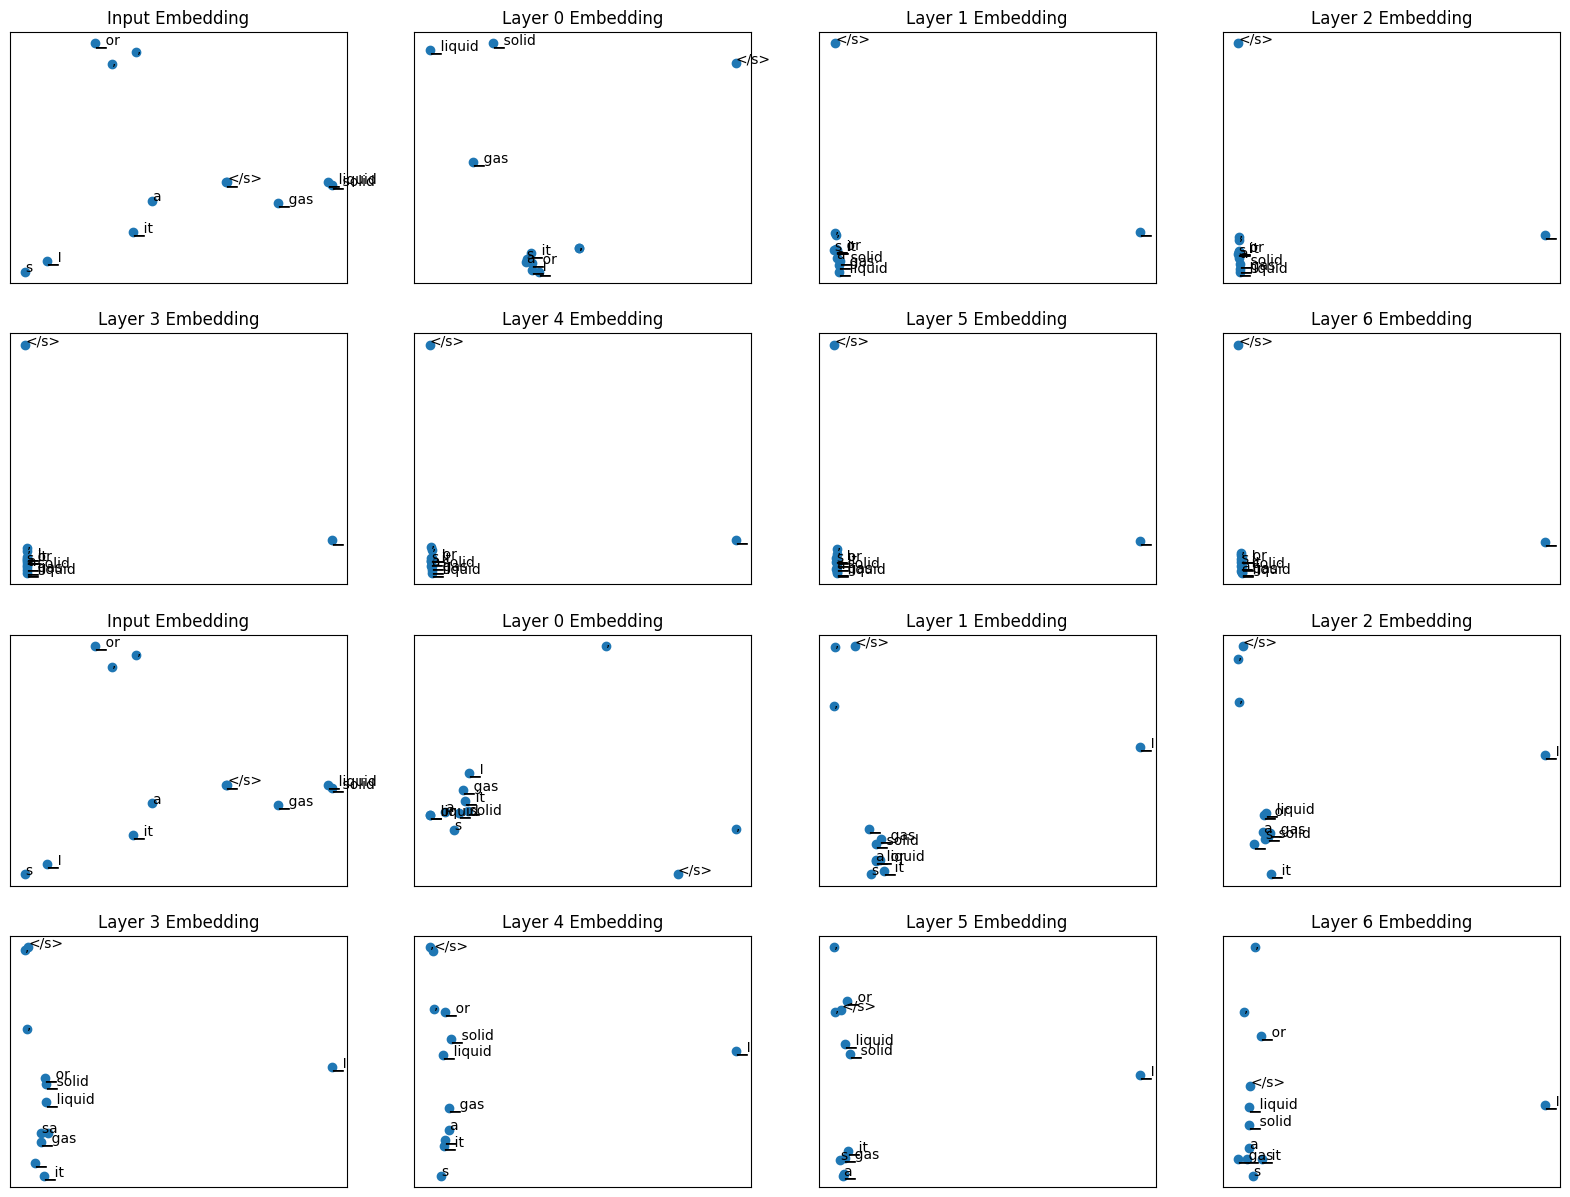

In [33]:

tokenizer = T5Tokenizer.from_pretrained('google/t5-v1_1-small')
model = T5ForConditionalGeneration.from_pretrained('google/flan-t5-small', output_hidden_states=True)

layers = [i for i in range(7)]
plot_t5_embeddings(text, input, (20,15))

In [34]:
from transformers import pipeline, set_seed

# 모델 설정
model_name = "gpt2"
generator = pipeline("text-generation", model=model_name, device=0)

# Seed 설정
set_seed(42)

# Prompt Tuning 적용
prompt = "The capital of France is _____"
input_text = "The capital of France is Paris."
result = generator(prompt + input_text, max_length=50)

# 모델 출력
generated_text = result[0]["generated_text"]
print(generated_text.replace(prompt, "").strip())

/home/uj-user/Yo/torch-venv/lib/python3.8/site-packages/transformers/generation/utils.py:1219: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


The capital of France is Paris. He was the king of France in the Middle Ages and the head of France from 1495 until his death in 606 (1875). It turned out therefore that not only are


In [13]:
from transformers import pipeline, set_seed

# 모델 설정
model_name = "gpt2"
generator = pipeline("text-generation", model=model_name, device=0)

# Seed 설정
set_seed(42)

# Instruction Prompt Tuning 적용
prompt = "summarize the following paragraph:\n"
input_text = "GPT is a language model developed by OpenAI. It is capable of generating human-like text and can be fine-tuned on specific tasks."
result = generator(prompt + input_text, max_length=50)

# 모델 출력
generated_text = result[0]["generated_text"]
print(generated_text.replace(prompt, "").strip())

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


GPT is a language model developed by OpenAI. It is capable of generating human-like text and can be fine-tuned on specific tasks. It has several functions:
• Proportional translation


In [1]:
import torch
from transformers import T5ForConditionalGeneration, T5Tokenizer

# T5 모델과 토크나이저 불러오기
model = T5ForConditionalGeneration.from_pretrained('google/flan-t5-large')
tokenizer = T5Tokenizer.from_pretrained('google/flan-t5-small')

# SQuAD 2.0 데이터셋 예시 문제
question = "What is the capital of France?"
context = "Paris is the capital city of France."
question = "Is it a gas, liquid, or solid?"
question ="Is the sun a star or a planet?"
# T5 모델 입력을 위한 전처리
inputs = tokenizer.encode_plus(question, return_tensors='pt', max_length=512, truncation=True)

# T5 모델로 문제 답변 생성
answer_ids = model.generate(inputs['input_ids'], num_beams=4, early_stopping=True)
answer = tokenizer.decode(answer_ids[0], skip_special_tokens=True)

print("Question:", question)
#print("Context:", context)
print("Answer:", answer)

Question: Is the sun a star or a planet?
Answer: a star


/home/uj-user/Yo/torch-venv/lib/python3.8/site-packages/transformers/generation/utils.py:1313: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [49]:
model = T5ForConditionalGeneration.from_pretrained('google/flan-t5-small')
answer_ids = model.generate(inputs['input_ids'], num_beams=4, early_stopping=True)
answer = tokenizer.decode(answer_ids[0], skip_special_tokens=True)

print("Question:", question)
print("Answer:", answer)

Question: Is the sun a star or a planet?
Answer: planet


In [50]:
model = T5ForConditionalGeneration.from_pretrained('google/flan-t5-base')
answer_ids = model.generate(inputs['input_ids'], num_beams=4, early_stopping=True)
answer = tokenizer.decode(answer_ids[0], skip_special_tokens=True)

print("Question:", question)
print("Answer:", answer)

Question: Is the sun a star or a planet?
Answer: star


In [3]:
model = T5ForConditionalGeneration.from_pretrained('google/flan-t5-large')
answer_ids = model.generate(inputs['input_ids'], num_beams=5, early_stopping=True)
answer = tokenizer.decode(answer_ids[0], skip_special_tokens=True)

print("Question:", question)
print("Answer:", answer)

Question: Is the sun a star or a planet?
Answer: a star


In [5]:
model = T5ForConditionalGeneration.from_pretrained('google/flan-t5-xl')
answer_ids = model.generate(inputs['input_ids'], num_beams=5, early_stopping=True)
answer = tokenizer.decode(answer_ids[0], skip_special_tokens=True)

print("Question:", question)
print("Answer:", answer)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Question: Is the sun a star or a planet?
Answer: star


In [55]:
model = T5ForConditionalGeneration.from_pretrained('google/t5-v1_1-xxl')
answer_ids = model.generate(inputs['input_ids'], num_beams=5, early_stopping=True)
answer = tokenizer.decode(answer_ids[0], skip_special_tokens=True)

print("Question:", question)
#print("Context:", context)
print("Answer:", answer)

Question: Is the sun a star or a planet?
Answer: a star or a planet? a star or a planet?


In [4]:
model = T5ForConditionalGeneration.from_pretrained('google/t5-v1_1-xl')
answer_ids = model.generate(inputs['input_ids'], num_beams=5, early_stopping=True)
answer = tokenizer.decode(answer_ids[0], skip_special_tokens=True)

print("Question:", question)
#print("Context:", context)
print("Answer:", answer)

Question: Is the sun a star or a planet?
Answer: ??


In [53]:
model = T5ForConditionalGeneration.from_pretrained('google/t5-v1_1-large')
answer_ids = model.generate(inputs['input_ids'], num_beams=5, early_stopping=True)
answer = tokenizer.decode(answer_ids[0], skip_special_tokens=True)

print("Question:", question)
#print("Context:", context)
print("Answer:", answer)

Question: Is the sun a star or a planet?
Answer: or a planet?


In [7]:
model = T5ForConditionalGeneration.from_pretrained('google/t5-v1_1-base')
tokenizer = T5Tokenizer.from_pretrained('google/t5-v1_1-small')
answer_ids = model.generate(inputs['input_ids'], num_beams=10, early_stopping=True)
answer = tokenizer.decode(answer_ids[0], skip_special_tokens=True)

print("Question:", question)
#print("Context:", context)
print("Answer:", answer)

Question: Is the sun a star or a planet?
Answer: . Is the sun a star or a planet?. Is the


In [6]:
model = T5ForConditionalGeneration.from_pretrained('google/t5-v1_1-small')
answer_ids = model.generate(inputs['input_ids'], num_beams=10, early_stopping=True)
answer = tokenizer.decode(answer_ids[0], skip_special_tokens=True)

print("Question:", question)
#print("Context:", context)
print("Answer:", answer)

Question: Is the sun a star or a planet?
Answer: ? Are stars a star?


In [22]:
inputs = tokenizer.encode_plus(question, context, return_tensors='pt', max_length=512, truncation=True)
inputs

{'input_ids': tensor([[ 363,   19,    8, 1784,   13, 1410,   58,    1, 1919,   19,    8, 1784,
          690,   13, 1410,    5,    1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [17]:
inputs

{'input_ids': tensor([[ 363,   19,    8, 1784,   13, 1410,   58,    1, 1919,   19,    8, 1784,
          690,   13, 1410,    5,    1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

torch.Size([12, 11, 11])
['trans', 'late', 'ĠEnglish', 'Ġto', 'ĠFrench', ':', 'ĠToday', 'Ġweather', 'Ġis', 'Ġso', 'Ġhot']


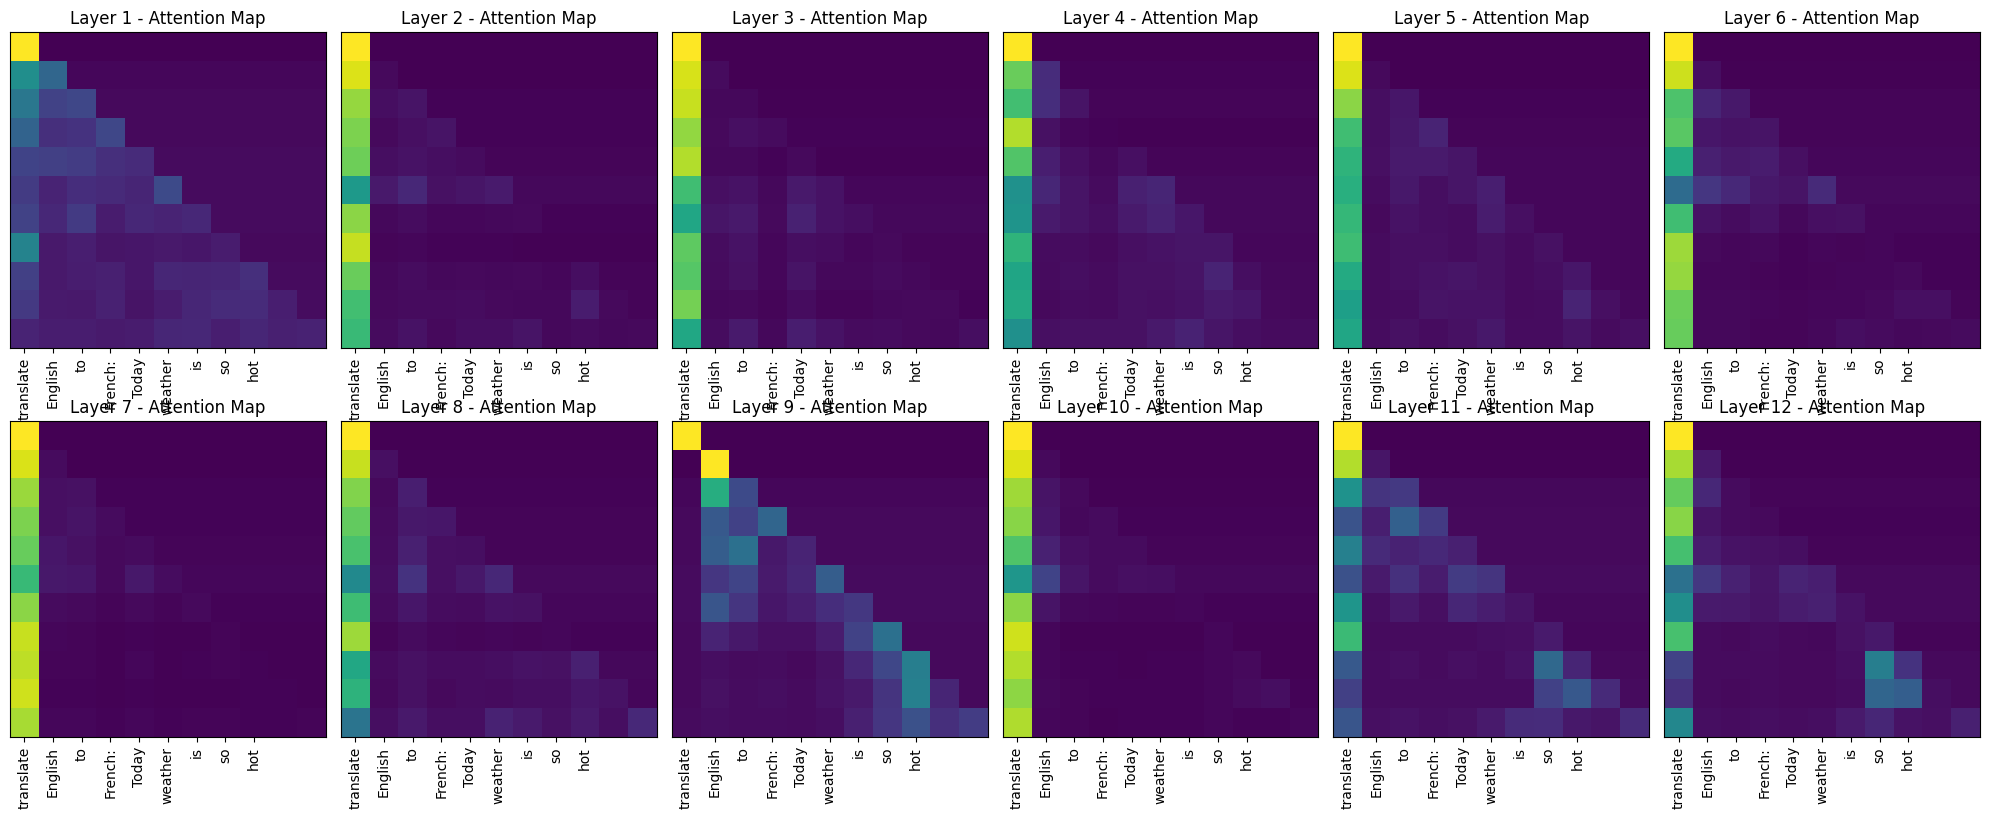

In [14]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

tokenizer = AutoTokenizer.from_pretrained('gpt2')
model = AutoModel.from_pretrained('gpt2', output_attentions=True)

text = "Hello My name is John. Welcome to my office. office name is same as my name. what is my office name?"
text = "translate English to French: Today weather is so hot"
input_ids = tokenizer.encode(text, return_tensors='pt')
outputs = model(input_ids)

attentions = outputs.attentions[-1].squeeze(0)
print(attentions.shape)
print(tokenizer.convert_ids_to_tokens(input_ids[0]))

fig, axs = plt.subplots(nrows=2, ncols=6, figsize=(20,8))
for i, layer in enumerate(attentions):
    attn = layer.squeeze(0)
    attn = F.softmax(attn, dim=-1)
    attn = attn.cpu().detach().numpy()
    ax = axs[i//6][i%6]
    ax.imshow(attn, cmap='viridis', interpolation='nearest')
    ax.set_xticks(range(len(tokenizer.decode(input_ids[0]).split())))
    ax.set_xticklabels(tokenizer.decode(input_ids[0]).split(), rotation=90)
    ax.set_yticks([])
    ax.set_title("Layer {} - Attention Map".format(i+1))
    ax.grid(False)

plt.tight_layout()
plt.show()

special token ids : [1, 2, 0, 32099, 32098, 32097, 32096, 32095, 32094, 32093, 32092, 32091, 32090, 32089, 32088, 32087, 32086, 32085, 32084, 32083, 32082, 32081, 32080, 32079, 32078, 32077, 32076, 32075, 32074, 32073, 32072, 32071, 32070, 32069, 32068, 32067, 32066, 32065, 32064, 32063, 32062, 32061, 32060, 32059, 32058, 32057, 32056, 32055, 32054, 32053, 32052, 32051, 32050, 32049, 32048, 32047, 32046, 32045, 32044, 32043, 32042, 32041, 32040, 32039, 32038, 32037, 32036, 32035, 32034, 32033, 32032, 32031, 32030, 32029, 32028, 32027, 32026, 32025, 32024, 32023, 32022, 32021, 32020, 32019, 32018, 32017, 32016, 32015, 32014, 32013, 32012, 32011, 32010, 32009, 32008, 32007, 32006, 32005, 32004, 32003, 32002, 32001, 32000]
special tokens : ['</s>', '<unk>', '<pad>', '<extra_id_0>', '<extra_id_1>', '<extra_id_2>', '<extra_id_3>', '<extra_id_4>', '<extra_id_5>', '<extra_id_6>', '<extra_id_7>', '<extra_id_8>', '<extra_id_9>', '<extra_id_10>', '<extra_id_11>', '<extra_id_12>', '<extra_id_13>'

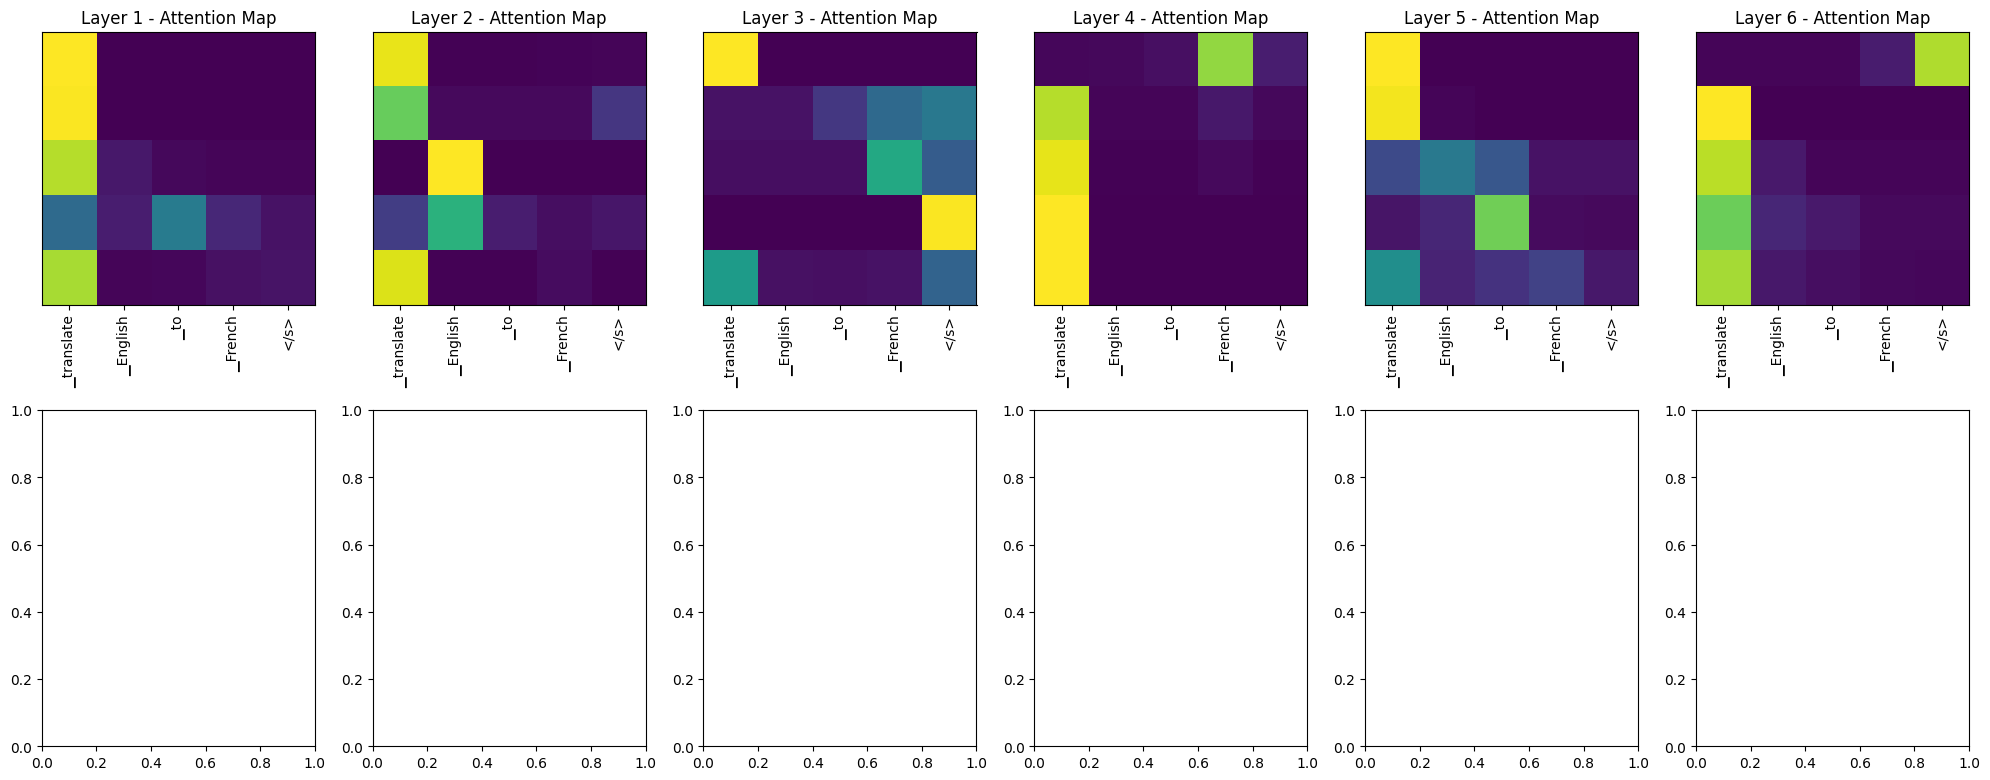

In [15]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from transformers import T5Tokenizer, T5ForConditionalGeneration,  DataCollatorWithPadding

tokenizer = T5Tokenizer.from_pretrained('google/t5-v1_1-small')
model = T5ForConditionalGeneration.from_pretrained('google/t5-v1_1-small', output_attentions=True)

print(f"special token ids : {tokenizer.all_special_ids}")
print(f"special tokens : {tokenizer.all_special_tokens}")

text = "Hello My name is John. Welcome to my office. office name is same as my name. what is my office name?"
text = "translate English to French: Today weather is so hot"

text = "translate English to French"
input = "today weather is so hot."

input_ids = tokenizer.encode(text, return_tensors='pt')
input_input_ids = tokenizer.encode(input, return_tensors='pt')
print('text_input_ids:', input_ids)
print('input_input_ids:', input_input_ids)
print(tokenizer.convert_ids_to_tokens(input_ids[0]))

outputs = model(input_ids=input_ids, labels=input_input_ids)
print(outputs.keys())

attentions = outputs.encoder_attentions[-1].squeeze(0)
print(attentions.shape)

fig, axs = plt.subplots(nrows=2, ncols=6, figsize=(20,8))
for i, layer in enumerate(attentions):
    attn = layer.squeeze(0)
    attn = F.softmax(attn, dim=-1)
    attn = attn.cpu().detach().numpy()

    ax = axs[i//6][i%6]
    ax.imshow(attn, cmap='viridis', interpolation='nearest')
    ax.set_xticks(range(len(tokenizer.convert_ids_to_tokens(input_ids[0]))))
    ax.set_xticklabels(tokenizer.convert_ids_to_tokens(input_ids[0]), rotation=90)
    ax.set_yticks([])
    ax.set_title("Layer {} - Attention Map".format(i+1))
    ax.grid(False)

plt.tight_layout()
plt.show()

special token ids : [1, 2, 0, 32099, 32098, 32097, 32096, 32095, 32094, 32093, 32092, 32091, 32090, 32089, 32088, 32087, 32086, 32085, 32084, 32083, 32082, 32081, 32080, 32079, 32078, 32077, 32076, 32075, 32074, 32073, 32072, 32071, 32070, 32069, 32068, 32067, 32066, 32065, 32064, 32063, 32062, 32061, 32060, 32059, 32058, 32057, 32056, 32055, 32054, 32053, 32052, 32051, 32050, 32049, 32048, 32047, 32046, 32045, 32044, 32043, 32042, 32041, 32040, 32039, 32038, 32037, 32036, 32035, 32034, 32033, 32032, 32031, 32030, 32029, 32028, 32027, 32026, 32025, 32024, 32023, 32022, 32021, 32020, 32019, 32018, 32017, 32016, 32015, 32014, 32013, 32012, 32011, 32010, 32009, 32008, 32007, 32006, 32005, 32004, 32003, 32002, 32001, 32000]
special tokens : ['</s>', '<unk>', '<pad>', '<extra_id_0>', '<extra_id_1>', '<extra_id_2>', '<extra_id_3>', '<extra_id_4>', '<extra_id_5>', '<extra_id_6>', '<extra_id_7>', '<extra_id_8>', '<extra_id_9>', '<extra_id_10>', '<extra_id_11>', '<extra_id_12>', '<extra_id_13>'

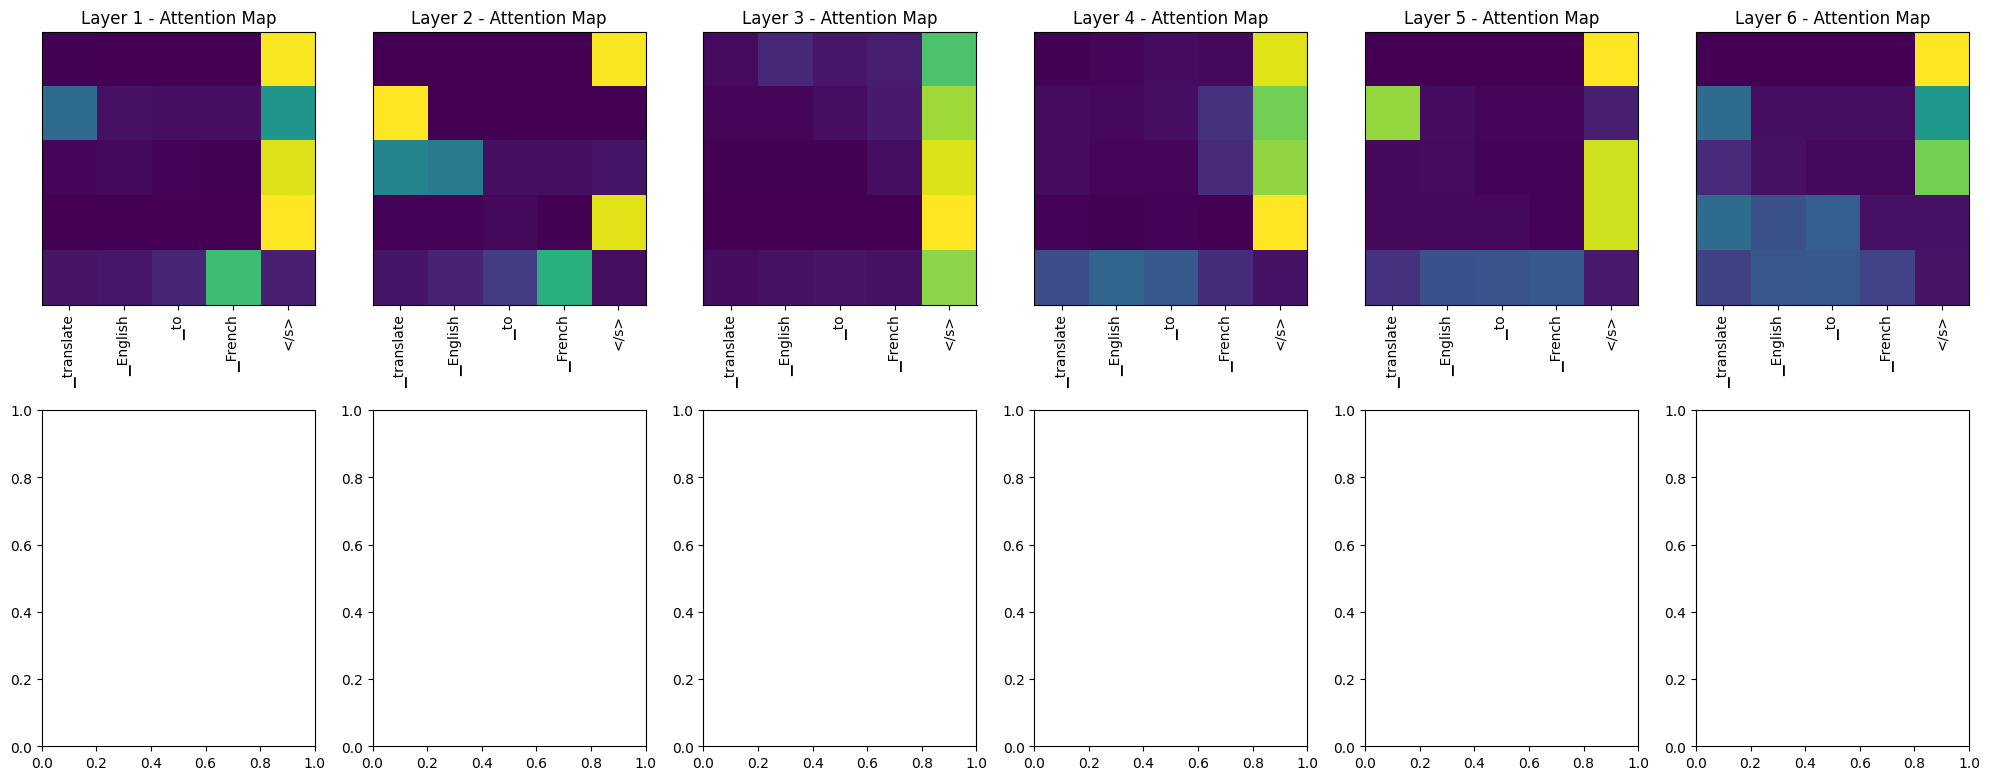

: 

In [16]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from transformers import T5Tokenizer, T5ForConditionalGeneration,  DataCollatorWithPadding

tokenizer = T5Tokenizer.from_pretrained('google/flan-t5-small')
model = T5ForConditionalGeneration.from_pretrained('google/flan-t5-small', output_attentions=True)

print(f"special token ids : {tokenizer.all_special_ids}")
print(f"special tokens : {tokenizer.all_special_tokens}")

text = "Hello My name is John. Welcome to my office. office name is same as my name. what is my office name?"
text = "translate English to French: Today weather is so hot"

text = "translate English to French"
input = "today weather is so hot."

input_ids = tokenizer.encode(text, return_tensors='pt')
input_input_ids = tokenizer.encode(input, return_tensors='pt')
print('text_input_ids:', input_ids)
print('input_input_ids:', input_input_ids)
print(tokenizer.convert_ids_to_tokens(input_ids[0]))

outputs = model(input_ids=input_ids, labels=input_input_ids)
print(outputs.keys())

attentions = outputs.encoder_attentions[-1].squeeze(0)
print(attentions.shape)

fig, axs = plt.subplots(nrows=2, ncols=6, figsize=(20,8))
for i, layer in enumerate(attentions):
    attn = layer.squeeze(0)
    attn = F.softmax(attn, dim=-1)
    attn = attn.cpu().detach().numpy()

    ax = axs[i//6][i%6]
    ax.imshow(attn, cmap='viridis', interpolation='nearest')
    ax.set_xticks(range(len(tokenizer.convert_ids_to_tokens(input_ids[0]))))
    ax.set_xticklabels(tokenizer.convert_ids_to_tokens(input_ids[0]), rotation=90)
    ax.set_yticks([])
    ax.set_title("Layer {} - Attention Map".format(i+1))
    ax.grid(False)

plt.tight_layout()
plt.show()